# 1 - Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2 - Data



In [ ]:
data=pd.read_csv("/content/netflix.csv",sep=",",
                 skipinitialspace=True,na_values="",quotechar='"')

In [ ]:
data.head(5) # first five rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Preprocessing

In [ ]:
data['date added:year']=data['date_added'].astype('datetime64[ns]').dt.year # added  year
data['date added:month']=data['date_added'].astype('datetime64[ns]').dt.month
data['duration_numeric']=data['duration'].str.split(" ").str[0].astype('float') # extract numeric values from duration column
# drop the column description as it is needed here
data.drop('description',inplace=True,axis=1)
# create a custom column called genre which only contains the last element for each genre
data['Genre']=data['listed_in'].str.split(",").str[-1].str.strip() # extract the last element from each list
data['type']=data['type'].astype('category')
data['rating']=data['rating'].astype("category")

In [ ]:
print("Shape of the data: ",data.shape)

Shape of the data:  (8807, 15)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   show_id           8807 non-null   object  
 1   type              8807 non-null   category
 2   title             8807 non-null   object  
 3   director          6173 non-null   object  
 4   cast              7982 non-null   object  
 5   country           7976 non-null   object  
 6   date_added        8797 non-null   object  
 7   release_year      8807 non-null   int64   
 8   rating            8803 non-null   category
 9   duration          8804 non-null   object  
 10  listed_in         8807 non-null   object  
 11  date added:year   8797 non-null   float64 
 12  date added:month  8797 non-null   float64 
 13  duration_numeric  8804 non-null   float64 
 14  Genre             8807 non-null   object  
dtypes: category(2), float64(3), int64(1), object(9)
memory usage: 912.6+ KB


In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'date added:year',
       'date added:month', 'duration_numeric', 'Genre'],
      dtype='object')

In [ ]:
print("Data types of all the attributes:\n",data.dtypes)

Data types of all the attributes:
 show_id               object
type                category
title                 object
director              object
cast                  object
country               object
date_added            object
release_year           int64
rating              category
duration              object
listed_in             object
date added:year      float64
date added:month     float64
duration_numeric     float64
Genre                 object
dtype: object


In [ ]:
# missing value detection: Number of missing values for each attriutes
print("Number of missing values for all the attributes:\n",data.isna().sum())

Number of missing values for all the attributes:
 show_id                0
type                   0
title                  0
director            2634
cast                 825
country              831
date_added            10
release_year           0
rating                 4
duration               3
listed_in              0
date added:year       10
date added:month      10
duration_numeric       3
Genre                  0
dtype: int64


# Number of unique actors 

In [ ]:
num_actors=data['cast'].str.split(",").explode().str.strip().dropna()
print("Number of actors :",len(num_actors.unique()))
print("some of them are :")
print(num_actors.unique()[0:20])

Number of actors : 36439
some of them are :
['Ama Qamata' 'Khosi Ngema' 'Gail Mabalane' 'Thabang Molaba'
 'Dillon Windvogel' 'Natasha Thahane' 'Arno Greeff' 'Xolile Tshabalala'
 'Getmore Sithole' 'Cindy Mahlangu' 'Ryle De Morny' 'Greteli Fincham'
 'Sello Maake Ka-Ncube' 'Odwa Gwanya' 'Mekaila Mathys' 'Sandi Schultz'
 'Duane Williams' 'Shamilla Miller' 'Patrick Mofokeng' 'Sami Bouajila']


# histogram plot number of actors from different countries

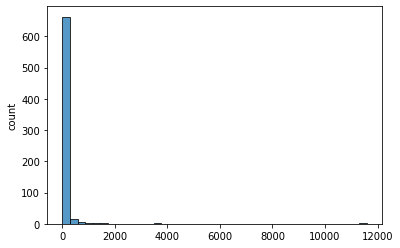

In [ ]:
actor=num_actors=data[['cast','country']]
actor=actor.assign(cast=actor.cast.str.split(",")).explode('cast')
actor['cast']=actor['cast'].str.strip()
actor=actor.dropna()
unique_actors=actor.cast.unique()
actors_count=[]
for country in actor.country.unique():
  actors_count.append(actor[actor['country']==country]['cast'].nunique())

plt.figure()
sns.histplot(x=actors_count,bins=40)
plt.ylabel('count')
plt.show()

# Number of unique directors

In [ ]:
num_directors=data['director'].str.split(",").explode().str.strip().dropna()
print("Number of directors :",len(num_directors.unique()))
print("some of them are :")
print(num_directors.unique()[0:20])

Number of directors : 4993
some of them are :
['Kirsten Johnson' 'Julien Leclercq' 'Mike Flanagan' 'Robert Cullen'
 'José Luis Ucha' 'Haile Gerima' 'Andy Devonshire' 'Theodore Melfi'
 'Kongkiat Komesiri' 'Christian Schwochow' 'Bruno Garotti'
 'Pedro de Echave García' 'Pablo Azorín Williams' 'Adam Salky'
 'Olivier Megaton' 'K.S. Ravikumar' 'Alex Woo' 'Stanley Moore'
 'S. Shankar' 'Rajiv Menon']


# Summary Statistics:Duration

In [ ]:
summary=data.groupby('type')['duration_numeric'].agg('describe')
print("Summary statistics of movie and shows:\n",summary)

Summary statistics of movie and shows:
           count       mean        std  min   25%   50%    75%    max
type                                                                
Movie    6128.0  99.577187  28.290593  3.0  87.0  98.0  114.0  312.0
TV Show  2676.0   1.764948   1.582752  1.0   1.0   1.0    2.0   17.0


# Number of unique values of each attribute

In [ ]:
print(data.nunique())

show_id             8807
type                   2
title               8807
director            4528
cast                7692
country              748
date_added          1767
release_year          74
rating                17
duration             220
listed_in            514
date added:year       14
date added:month      12
duration_numeric     210
Genre                 40
dtype: int64


# Total number of countries

In [ ]:
print("Number of countries:",len(data['country'].str.split(",").explode().str.strip().dropna().unique()))
print()
print(data['country'].str.split(",").explode().str.strip().unique())

Number of countries: 123

['United States' 'South Africa' nan 'India' 'Ghana' 'Burkina Faso'
 'United Kingdom' 'Germany' 'Ethiopia' 'Czech Republic' 'Mexico' 'Turkey'
 'Australia' 'France' 'Finland' 'China' 'Canada' 'Japan' 'Nigeria' 'Spain'
 'Belgium' 'South Korea' 'Singapore' 'Italy' 'Romania' 'Argentina'
 'Venezuela' 'Hong Kong' 'Russia' '' 'Ireland' 'Nepal' 'New Zealand'
 'Brazil' 'Greece' 'Jordan' 'Colombia' 'Switzerland' 'Israel' 'Taiwan'
 'Bulgaria' 'Algeria' 'Poland' 'Saudi Arabia' 'Thailand' 'Indonesia'
 'Egypt' 'Denmark' 'Kuwait' 'Netherlands' 'Malaysia' 'Vietnam' 'Hungary'
 'Sweden' 'Lebanon' 'Syria' 'Philippines' 'Iceland' 'United Arab Emirates'
 'Norway' 'Qatar' 'Mauritius' 'Austria' 'Cameroon' 'Palestine' 'Uruguay'
 'Kenya' 'Chile' 'Luxembourg' 'Cambodia' 'Bangladesh' 'Portugal'
 'Cayman Islands' 'Senegal' 'Serbia' 'Malta' 'Namibia' 'Angola' 'Peru'
 'Mozambique' 'Belarus' 'Zimbabwe' 'Puerto Rico' 'Pakistan' 'Cyprus'
 'Guatemala' 'Iraq' 'Malawi' 'Paraguay' 'Croatia' 'Iran'

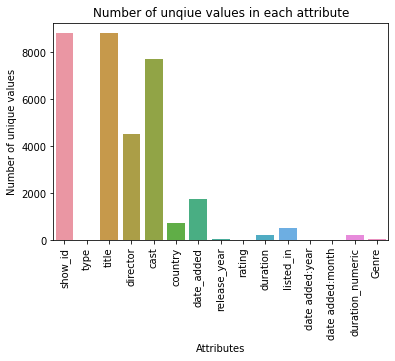

In [ ]:
# Unique attributes
plt.figure()
unique_values=data.nunique().reset_index()
unique_values.columns=['Attributes','No. unique values']
sns.barplot(x='Attributes',y='No. unique values',data=unique_values)
plt.xlabel('Attributes')
plt.ylabel('Number of unique values')
ax=plt.gca()
ax.set_xticklabels(unique_values.Attributes,rotation=90)
plt.title('Number of unqiue values in each attribute')
plt.show()

# Range of the attributes like duration,release_year,date_added

In [ ]:
data['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [ ]:
# duration
print("Duration: ")
minimum=data[data['type']=='Movie']['duration_numeric'].min()
maximum=data[data['type']=='Movie']['duration_numeric'].max()

print("Maximum Movie duration:",data[data['type']=='Movie']['duration_numeric'].max())
print("Minimum Movie duration:",data[data['type']=='Movie']['duration_numeric'].min())
print(f'Range of Movie duration:from {minimum} to {maximum}')

# for tvs shows:
print()
minimum=data[data['type']=='TV Show']['duration_numeric'].max()
maximum=data[data['type']=='TV Show']['duration_numeric'].min()

print("Maximum tv shows duration(number seasons):",data[data['type']=='TV Show']['duration_numeric'].max())
print("Minimum tv show duration(number of seasons):",data[data['type']=='TV Show']['duration_numeric'].min())
print(f'Range of tv show duration(number of seasons):from {minimum} to {maximum}')


# release year
print()
print('Release year:')
print("First release year was ",data['release_year'].min())
print("Latest release year as per the data is ",data['release_year'].max())
print()

# date added year
print("Netflix produced their first movie/show was in the year:",int(data['date added:year'].min()))
print("Latest year that Netflix  produced  movie/show is in the year:",int(data['date added:year'].max()))




Duration: 
Maximum Movie duration: 312.0
Minimum Movie duration: 3.0
Range of Movie duration:from 3.0 to 312.0

Maximum tv shows duration(number seasons): 17.0
Minimum tv show duration(number of seasons): 1.0
Range of tv show duration(number of seasons):from 17.0 to 1.0

Release year:
First release year was  1925
Latest release year as per the data is  2021

Netflix produced their first movie/show was in the year: 2008
Latest year that Netflix  produced  movie/show is in the year: 2021


# Unique Genres

In [ ]:
# some of the unqie genres
data['listed_in'].dropna().unique()[:20]

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas'],
      dtype=object)

In [ ]:
print("Value Counts:\n")
print("Type attribute:\n",data['type'].value_counts())
print()
print("title attribute:\n",data['title'].value_counts())
print()
print("country atribute:\n",data['country'].value_counts())
print()
print("date_added attribute:\n",data['date_added'].value_counts())
print()
print("release_year attribute:\n",data['release_year'].value_counts())
print()
print("rating attribute:\n",data['rating'].value_counts())
print()
print("duration attribute:\n",data['duration'].value_counts())
print()
print("Genres:")
print(data['listed_in'].value_counts())

Value Counts:

Type attribute:
 Movie      6131
TV Show    2676
Name: type, dtype: int64

title attribute:
 Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: title, Length: 8807, dtype: int64

country atribute:
 United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala            

# 20 most famous genres for movies as well as tv shows

In [ ]:
# movies as well as tv shows genre counts
print('Movie Genres count:\n')
print(data[data['type']=='Movie'].listed_in.value_counts().sort_values(ascending=False).head(20))
print()
print('TV Show genres count:\n')
print(data[data['type']=='TV Show'].listed_in.value_counts().sort_values(ascending=False).head(20))

Movie Genres count:

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
Comedies, International Movies, Romantic Movies     152
Dramas                                              138
Dramas, International Movies, Thrillers             134
Action & Adventure, Dramas, International Movies    132
Action & Adventure                                  128
Comedies, Dramas, Independent Movies                116
Comedies                                            110
Action & Adventure, Interna

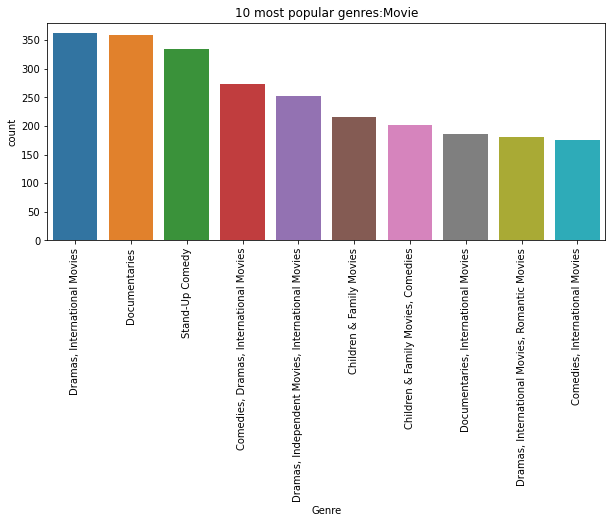

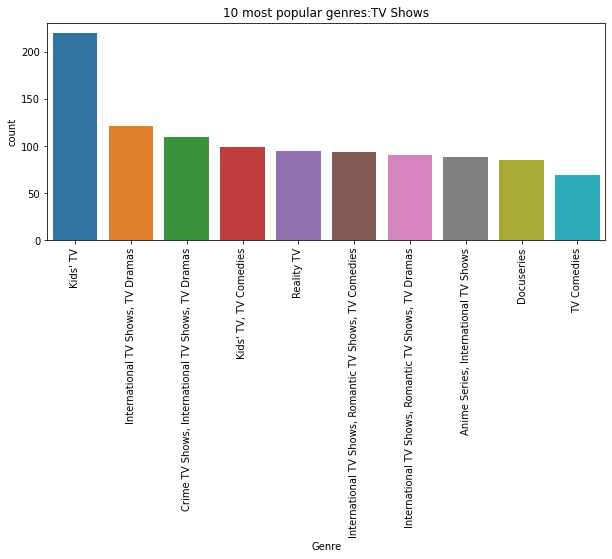

In [ ]:
genre_movie=data[data['type']=='Movie'].listed_in.value_counts().sort_values(ascending=False).reset_index().head(10)
plt.figure(figsize=(10,4))
sns.barplot(x='index',y='listed_in',data=genre_movie)
plt.xlabel('Genre')
plt.ylabel('count')
plt.title("10 most popular genres:Movie")
ax=plt.gca()
ax.set_xticklabels(genre_movie['index'],rotation=90)
plt.show("popular10genresmovie.jpg")
plt.show()

genre_shows=data[data['type']=='TV Show'].listed_in.value_counts().sort_values(ascending=False).reset_index().head(10)
plt.figure(figsize=(10,4))
sns.barplot(x='index',y='listed_in',data=genre_shows)
plt.xlabel('Genre')
plt.ylabel('count')
plt.title("10 most popular genres:TV Shows")
ax=plt.gca()
ax.set_xticklabels(genre_shows['index'],rotation=90)
plt.savefig("popular10Genreshows.jpg")
plt.show()


# 20 least famous genres: movies and tv shows

In [ ]:
# movies as well as tv shows genre counts
print('Movie Genres count:\n')
print(data[data['type']=='Movie'].listed_in.value_counts().sort_values(ascending=False).tail(20))
print()
print('TV Show genres count:\n')
print(data[data['type']=='TV Show'].listed_in.value_counts().sort_values(ascending=False).tail(20))

Movie Genres count:

Anime Features                                               1
Comedies, Cult Movies, Sci-Fi & Fantasy                      1
Action & Adventure, Romantic Movies, Sci-Fi & Fantasy        1
Cult Movies, Horror Movies, Thrillers                        1
Action & Adventure, Anime Features                           1
Action & Adventure, Comedies, Sports Movies                  1
Action & Adventure, Cult Movies                              1
Action & Adventure, Children & Family Movies, Cult Movies    1
Action & Adventure, Classic Movies, Sci-Fi & Fantasy         1
Action & Adventure, Comedies, Music & Musicals               1
Classic Movies, Horror Movies, Thrillers                     1
Children & Family Movies, Classic Movies, Dramas             1
Comedies, Dramas, Sports Movies                              1
Dramas, Faith & Spirituality, Sports Movies                  1
Classic Movies, Comedies, Romantic Movies                    1
Classic Movies, Dramas, LGBTQ Movi

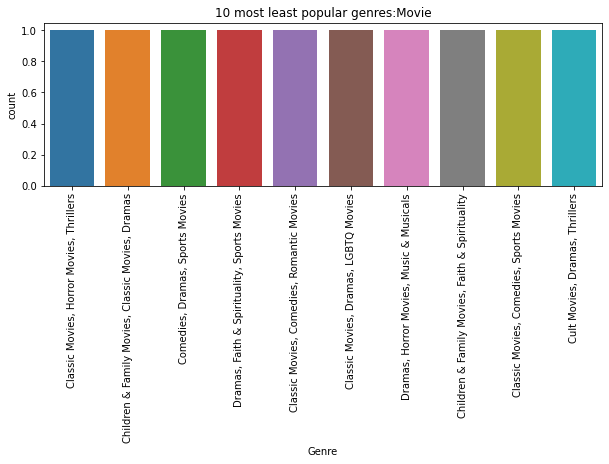

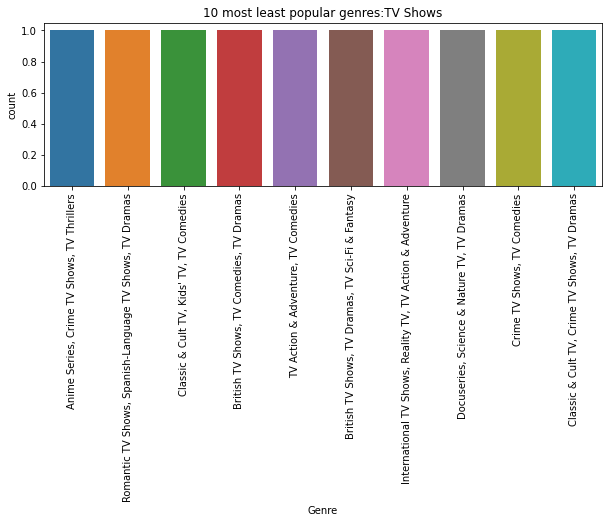

In [ ]:
genre_movie=data[data['type']=='Movie'].listed_in.value_counts().sort_values(ascending=False).reset_index().tail(10)
plt.figure(figsize=(10,3))
sns.barplot(x='index',y='listed_in',data=genre_movie)
plt.xlabel('Genre')
plt.ylabel('count')
plt.title("10 most least popular genres:Movie")
ax=plt.gca()
ax.set_xticklabels(genre_movie['index'],rotation=90)
plt.savefig("leastpopgenresmovie.jpg")
plt.show()

genre_shows=data[data['type']=='TV Show'].listed_in.value_counts().sort_values(ascending=False).reset_index().tail(10)
plt.figure(figsize=(10,3))
sns.barplot(x='index',y='listed_in',data=genre_shows)
plt.xlabel('Genre')
plt.ylabel('count')
plt.title("10 most least popular genres:TV Shows")
ax=plt.gca()
ax.set_xticklabels(genre_shows['index'],rotation=90)
plt.savefig("leastpopgenresshows.jpg")
plt.show()


# Number of movies and tv shows

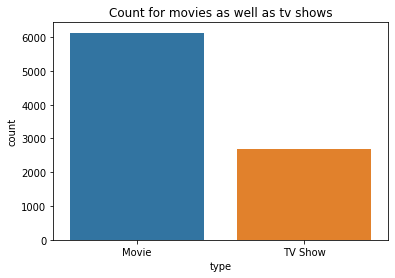

In [ ]:
plt.figure()
sns.countplot(x='type',data=data) 
plt.title('Count for movies as well as tv shows')
plt.savefig("movievsshows.jpg")
plt.show()

# Number of movies and tv shows Netflix produced per year

In [ ]:
number_movies=data[data['type']=='Movie'].groupby('date added:year').size()
number_movies.index=number_movies.index.astype('int')

# similarly number of shows added to Netflix per year 
number_shows=data[data['type']=='TV Show'].groupby('date added:year').size()
number_shows.index=number_shows.index.astype('int')

print("Number of movies added in Netflix per year:\n",number_movies)
print("Number of shows added in Netflix per year:\n",number_shows)

Number of movies added in Netflix per year:
 date added:year
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     253
2017     839
2018    1237
2019    1424
2020    1284
2021     993
dtype: int64
Number of shows added in Netflix per year:
 date added:year
2008      1
2013      5
2014      5
2015     26
2016    176
2017    349
2018    412
2019    592
2020    595
2021    505
dtype: int64


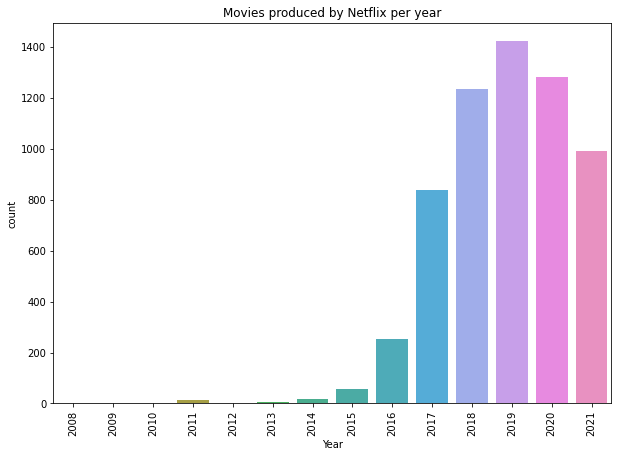

In [ ]:
number_movies=number_movies.reset_index()
number_movies.columns=['year','count']
plt.figure(figsize=(10,7))
sns.barplot(x='year',y='count',data=number_movies)
plt.xlabel('Year')
plt.ylabel('count')
plt.title("Movies produced by Netflix per year")
ax=plt.gca()
ax.set_xticklabels(number_movies['year'],rotation=90)
plt.savefig("movieproduced.jpg")
plt.show()

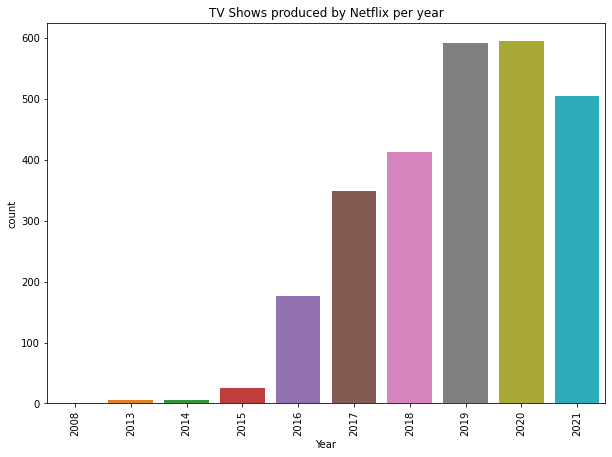

In [ ]:
number_shows=number_shows.reset_index()
number_shows.columns=['year','count']
plt.figure(figsize=(10,7))
sns.barplot(x='year',y='count',data=number_shows)
plt.xlabel('Year')
plt.ylabel('count')
plt.title("TV Shows produced by Netflix per year")
ax=plt.gca()
ax.set_xticklabels(number_shows['year'],rotation=90)
plt.savefig("showsproduced.jpg")
plt.show()

# Number of movies as well as tv shows added per month over all the years of business

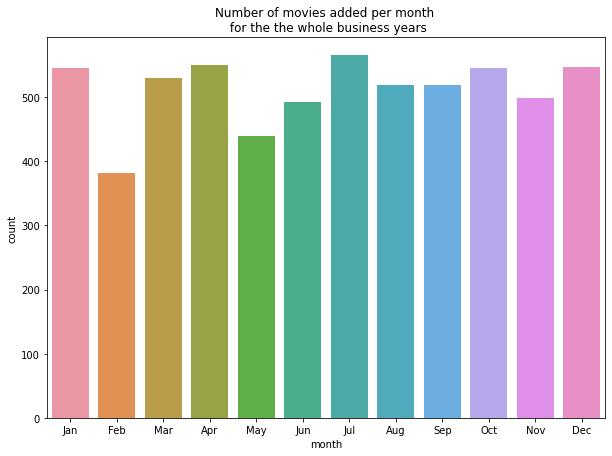

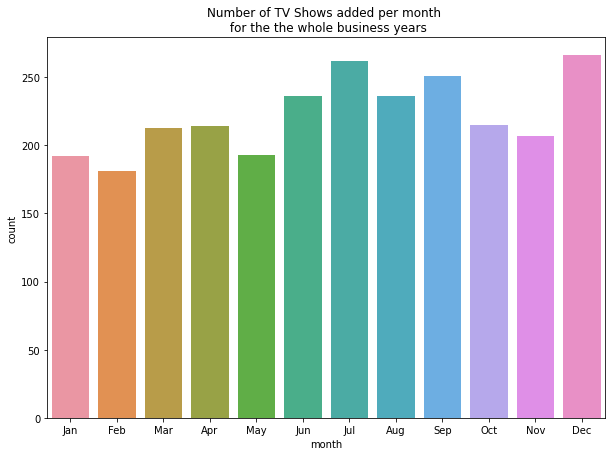

In [ ]:
# Number of movies as well as TV Shows added per month over for all the years of business
plt.figure(figsize=(10,7))
sns.countplot(x='date added:month',data=data[data['type']=='Movie'])
plt.title('Number of movies added per month \n for the the whole business years')
plt.xticks([])
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(range(len(labels)),labels)
plt.xlabel('month')
plt.show()

# similarly for tv shows
plt.figure(figsize=(10,7))
sns.countplot(x='date added:month',data=data[data['type']=='TV Show'])
plt.title('Number of TV Shows added per month \n for the the whole business years')
plt.xticks([])
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(range(len(labels)),labels)
plt.xlabel('month')
plt.show()



# Number of Movies as well as TV shows available for each country 

In [ ]:
tv_shows=data[data['type']=='TV Show']['country']
movies=data[data['type']=='Movie']['country']

tv_shows=tv_shows.str.strip().str.split(",").explode()
movies=movies.str.strip().str.split(",").explode()

tv_shows=tv_shows.str.strip().value_counts().sort_values(ascending=False)
movies=movies.str.strip().value_counts().sort_values(ascending=False)
print("Number of movies for each country:\n",movies.head(50))

print()
print("Number of tv shows for each country:\n",tv_shows.head(50))


Number of movies for each country:
 United States           2752
India                    962
United Kingdom           534
Canada                   319
France                   303
Germany                  182
Spain                    171
Japan                    119
China                    114
Mexico                   111
Egypt                    102
Hong Kong                100
Nigeria                   94
Australia                 94
Indonesia                 86
Turkey                    83
Philippines               80
Belgium                   78
Italy                     75
Argentina                 71
Brazil                    66
South Korea               61
South Africa              51
Thailand                  46
Netherlands               42
United Arab Emirates      36
Denmark                   34
Poland                    32
Ireland                   32
Sweden                    31
New Zealand               25
Chile                     24
Lebanon                   24
Norway 

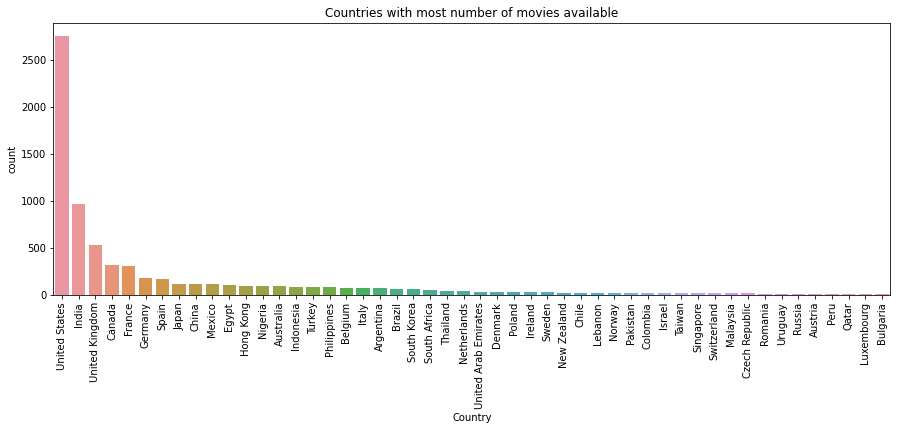

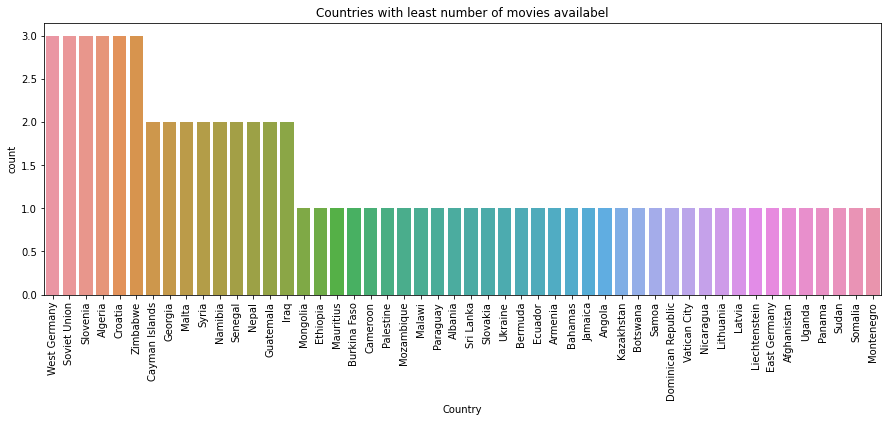

In [ ]:
# not possible to plo every country in single plot 
# so will have three count plot for 50 countries each  

# plot for 50 countries with most number of movies
plt.figure(figsize=(15,5))
sns.barplot(x=movies.iloc[0:50].index,y=movies.iloc[0:50])
plt.title('Countries with most number of movies available')
plt.ylabel('count')
plt.xlabel('Country')
ax=plt.gca()
ax.set_xticklabels(movies.iloc[0:50].index.to_list(),rotation=90)
plt.savefig("nummoviesavailable.jpg")
plt.show()

# countries with least number of movies
plt.figure(figsize=(15,5))
sns.barplot(x=movies.iloc[-50:].index,y=movies.iloc[-50:])
plt.title('Countries with least number of movies availabel')
plt.ylabel('count')
plt.xlabel('Country')
ax=plt.gca()
ax.set_xticklabels(movies.iloc[-50:].index.to_list(),rotation=90)
plt.savefig("leastnummoviesavailable.jpg")
plt.show()

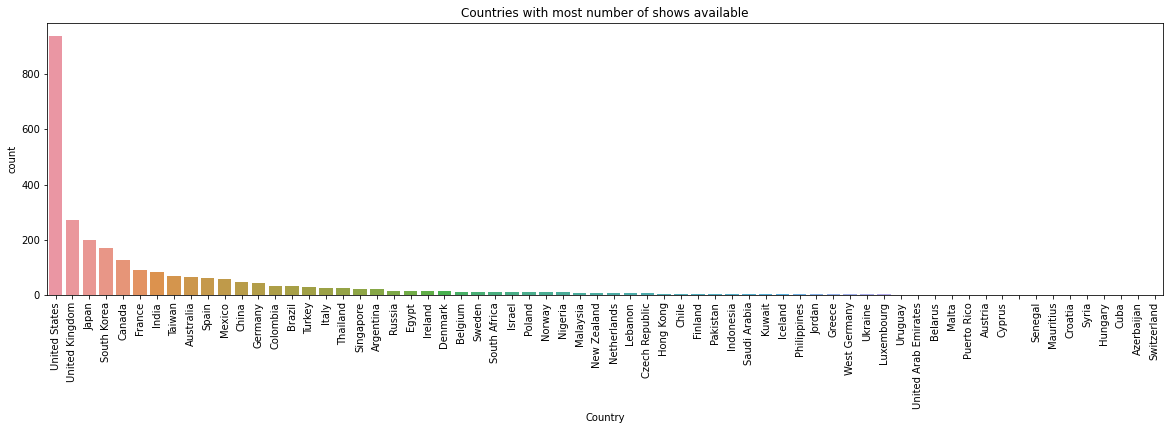

In [ ]:
# countries with most number of shows availabel
plt.figure(figsize=(20,5))
sns.barplot(x=tv_shows.index,y=tv_shows)
plt.title('Countries with most number of shows available')
plt.ylabel('count')
plt.xlabel('Country')
ax=plt.gca()
ax.set_xticklabels(tv_shows.index.to_list(),rotation=90)
plt.savefig("numshowsavailabel.jpg")
plt.show()


# Countries with atleast 10 number of titles produced


In [ ]:
most_produced=data.groupby('country')['title'].count().sort_values(ascending=False)
most_produced=most_produced[most_produced>=10]
most_produced.head(70)

country
United States                    2818
India                             972
United Kingdom                    419
Japan                             245
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          87
Taiwan                             81
Indonesia                          79
Brazil                             77
United Kingdom, United States      75
Philippines                        75
United States, Canada              73
Germany                            67
China                              66
Thailand                           61
Argentina                          56
Hong Kong                          53
United States, United Kingdom      47
Italy                              45
Cana

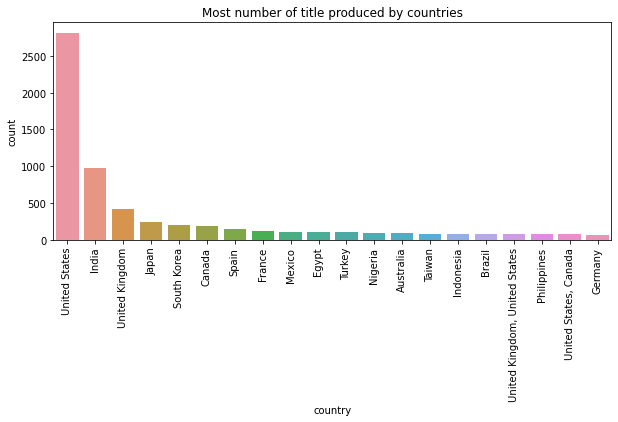

In [ ]:
most_produced=most_produced.head(20).reset_index()
plt.figure(figsize=(10,4))
sns.barplot(x='country',y='title',data=most_produced)
plt.xlabel('country')
plt.ylabel('count')
plt.title('Most number of title produced by countries')
ax=plt.gca()
ax.set_xticklabels(most_produced.country,rotation=90)
plt.savefig("mosttitleproduced.jpg")
plt.show()

# Number of countries for each unique genre for TV Shows as well as Movies 

# TV Shows

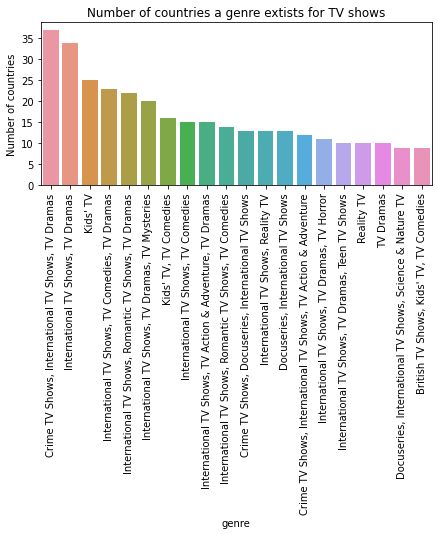

In [ ]:
tv_genre=data[data['type']=='TV Show']
tv_genre=tv_genre[['country','listed_in']]
tv_genre=tv_genre.assign(country=tv_genre.country.str.split(",")).explode('country')
tv_genre['country']=tv_genre['country'].str.strip()
unique_genres=tv_genre['listed_in'].unique()
count_genres=[]
for genre in unique_genres:
  count_genres.append(tv_genre[tv_genre['listed_in']==genre]['country'].nunique())
tv_shows_genre=pd.Series(count_genres,index=unique_genres)
tv_shows_genre=tv_shows_genre.sort_values(ascending=False)[:20]
plt.figure(figsize=(7,3))
sns.barplot(x=tv_shows_genre.index,y=tv_shows_genre.to_numpy())
plt.xlabel('genre')
plt.ylabel('Number of countries')
plt.title("Number of countries a genre extists for TV shows")
ax=plt.gca()
ax.set_xticklabels(tv_shows_genre.index,rotation=90)
plt.savefig("countriesagenreexiststv.jpg")
plt.show()

# Movies

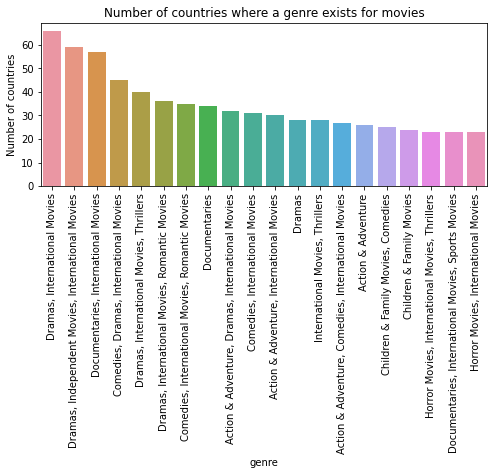

In [ ]:
movie_genre=data[data['type']=='Movie']
movie_genre=movie_genre[['country','listed_in']]
movie_genre=movie_genre.assign(country=movie_genre.country.str.split(",")).explode('country')
movie_genre['country']=movie_genre['country'].str.strip()
unique_genres=movie_genre['listed_in'].unique()
count_genres=[]
for genre in unique_genres:
  count_genres.append(movie_genre[movie_genre['listed_in']==genre]['country'].nunique())
movies_genre=pd.Series(count_genres,index=unique_genres)
movies_genre=movies_genre.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,3))
sns.barplot(x=movies_genre.index,y=movies_genre.to_numpy())
plt.xlabel('genre')
plt.ylabel('Number of countries')
plt.title("Number of countries where a genre exists for movies")
ax=plt.gca()
ax.set_xticklabels(movies_genre.index,rotation=90)
plt.savefig("countriesagenreexistsmovie.jpg")
plt.show()

# For each unique genres we are gonna count how many times it apeared for all the 20 most title producing countries.Then we will find the correlation between the 20 most title producing countries

In [ ]:
most_title_producing_countries=most_produced['country'].to_list()
d={}
unique_genres=data['listed_in'].unique()
for country in most_title_producing_countries:
  count=[]
  for genre in unique_genres:
    count.append((data[data['country']==country]['listed_in']==genre).sum())
  d[country]=count

In [ ]:
# data frame of 20 most countries of genres count
df=pd.DataFrame(d,index=unique_genres)
df.head(10)

,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Mexico,Egypt,Turkey,Nigeria,Australia,Taiwan,Indonesia,Brazil,"United Kingdom, United States",Philippines,"United States, Canada",Germany
Documentaries,249,0,40,0,0,7,0,0,0,0,0,0,0,0,0,0,2,0,1,0
"International TV Shows, TV Dramas, TV Mysteries",0,0,0,2,1,1,0,1,0,2,2,0,1,1,0,2,0,0,0,1
"Crime TV Shows, International TV Shows, TV Action & Adventure",0,1,0,1,0,0,0,2,0,0,2,0,0,1,0,0,0,0,0,0
"Docuseries, Reality TV",14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"International TV Shows, Romantic TV Shows, TV Comedies",0,7,0,1,7,0,0,1,0,0,2,1,0,31,0,0,0,1,0,1
"TV Dramas, TV Horror, TV Mysteries",5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Children & Family Movies,80,7,3,0,0,16,0,1,1,0,0,0,0,0,1,2,0,0,6,0
"Dramas, Independent Movies, International Movies",0,108,4,0,0,1,6,7,8,1,1,0,0,1,1,1,1,3,0,5
"British TV Shows, Reality TV",0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Comedies, Dramas",20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Now find correlation between 20 most title producing countries
df.corr()

,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Mexico,Egypt,Turkey,Nigeria,Australia,Taiwan,Indonesia,Brazil,"United Kingdom, United States",Philippines,"United States, Canada",Germany
United States,1.000000,-0.004137,0.505751,-0.032522,-0.017724,0.583091,-0.005550,0.151818,0.267973,-0.032221,-0.024754,-0.014552,0.287238,-0.024950,-0.023924,0.299260,0.429589,-0.030347,0.401169,0.164318
India,-0.004137,1.000000,0.103385,0.044082,0.081227,0.072360,0.544676,0.554232,0.385819,0.496381,0.477957,0.764123,0.053615,0.099016,0.649858,0.370383,0.032357,0.624506,0.012192,0.457361
United Kingdom,0.505751,0.103385,1.000000,-0.019108,-0.005600,0.265219,0.136501,0.228160,0.224451,0.032525,0.026459,0.092007,0.124184,-0.009149,0.056811,0.247674,0.264239,0.032743,0.101785,0.210708
Japan,-0.032522,0.044082,-0.019108,1.000000,0.009282,-0.013632,0.017748,0.034186,-0.002935,0.038300,0.026980,0.064074,0.019452,0.047769,0.041246,0.035428,-0.025035,0.014046,-0.016716,0.038165
South Korea,-0.017724,0.081227,-0.005600,0.009282,1.000000,-0.006379,0.051253,0.063974,0.019471,0.056459,0.059726,0.095752,0.016774,0.127166,0.034749,0.055466,-0.019076,0.032676,-0.011777,0.080955
Canada,0.583091,0.072360,0.265219,-0.013632,-0.006379,1.000000,0.146930,0.325970,0.112160,0.100480,0.128543,0.056405,0.375399,-0.011652,0.043024,0.313587,0.378889,0.051839,0.708031,0.233236
Spain,-0.005550,0.544676,0.136501,0.017748,0.051253,0.146930,1.000000,0.517299,0.645434,0.530919,0.513961,0.586705,0.131432,0.042111,0.353159,0.390953,0.021191,0.330635,0.022896,0.521669
France,0.151818,0.554232,0.228160,0.034186,0.063974,0.325970,0.517299,1.000000,0.449595,0.329891,0.382981,0.430297,0.428758,0.120250,0.300801,0.647529,-0.017561,0.287759,0.231669,0.572695
Mexico,0.267973,0.385819,0.224451,-0.002935,0.019471,0.112160,0.645434,0.449595,1.000000,0.218194,0.222692,0.282961,0.158080,0.011369,0.214439,0.565634,-0.012088,0.204177,0.009910,0.442187
Egypt,-0.032221,0.496381,0.032525,0.038300,0.056459,0.100480,0.530919,0.329891,0.218194,1.000000,0.885118,0.678592,0.016619,0.073101,0.365552,0.415339,0.047308,0.375929,-0.006276,0.544635


# HeatMap

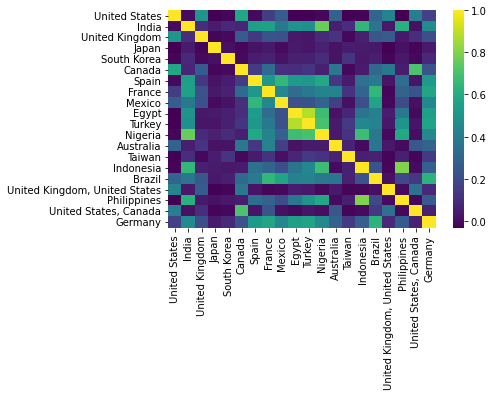

In [ ]:
sns.heatmap(df.corr(),cmap='viridis')
plt.savefig("corr20countr.jpg")
plt.show()

#Pair plot

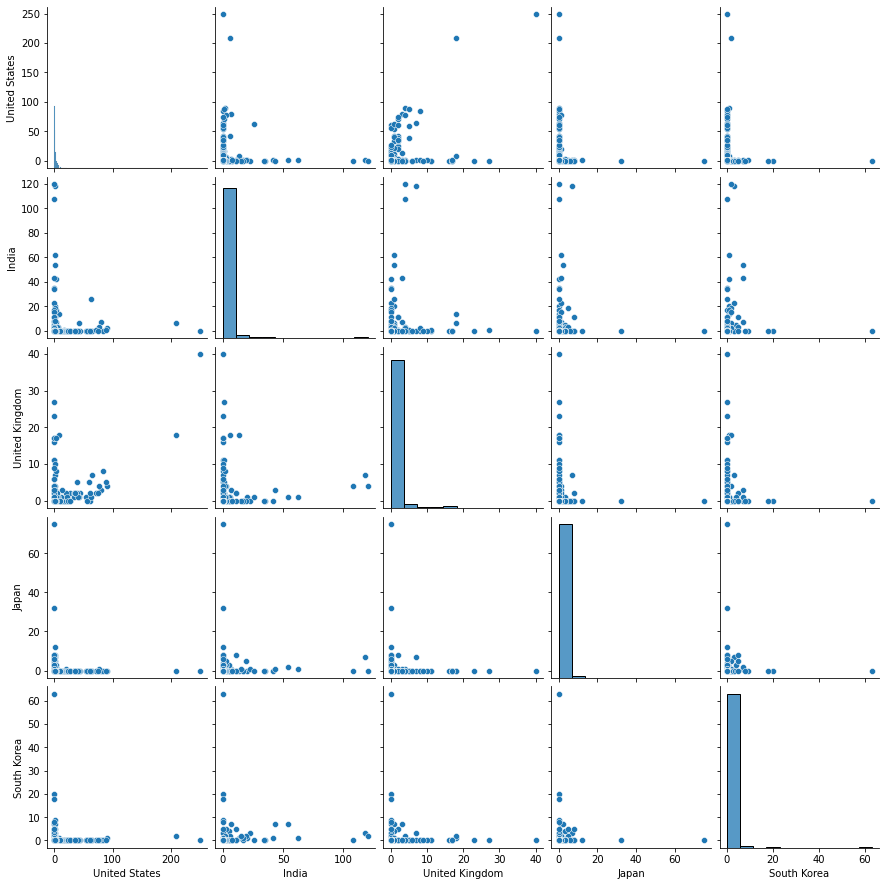

In [ ]:
sns.pairplot(df.iloc[:,0:5])

# Top 20 content(genres) of 20 most title produced countries

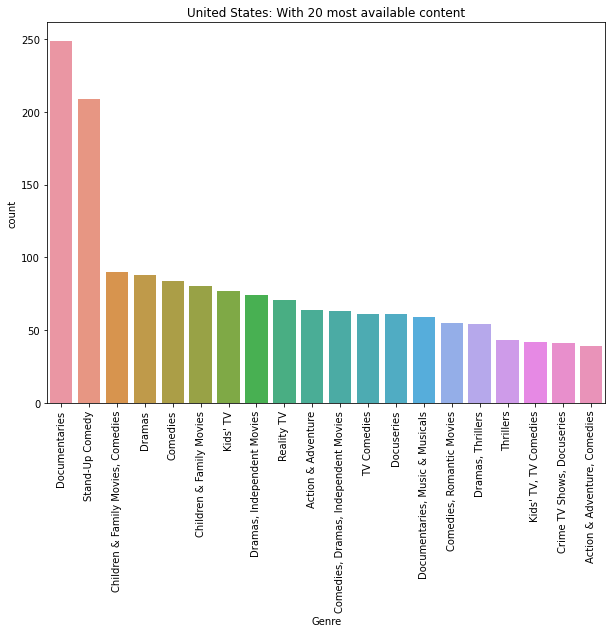

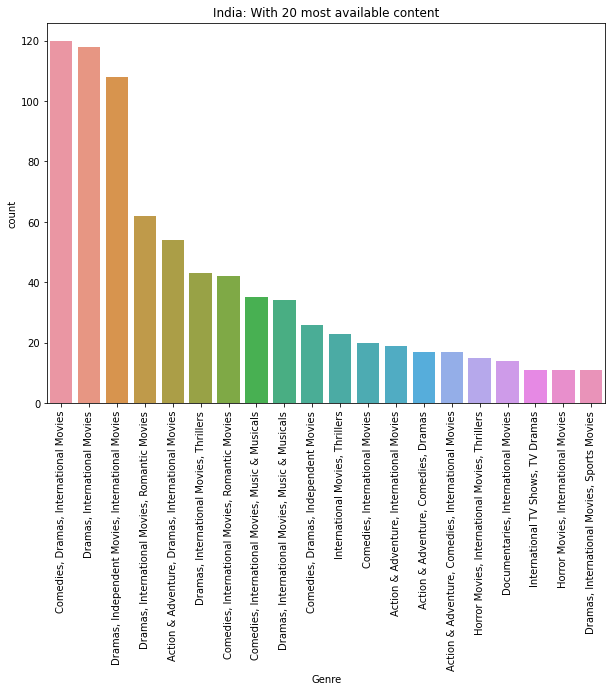

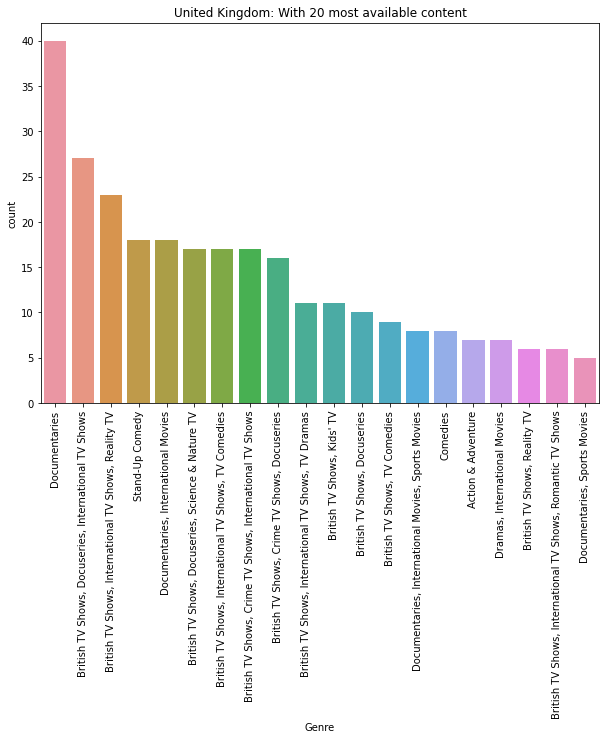

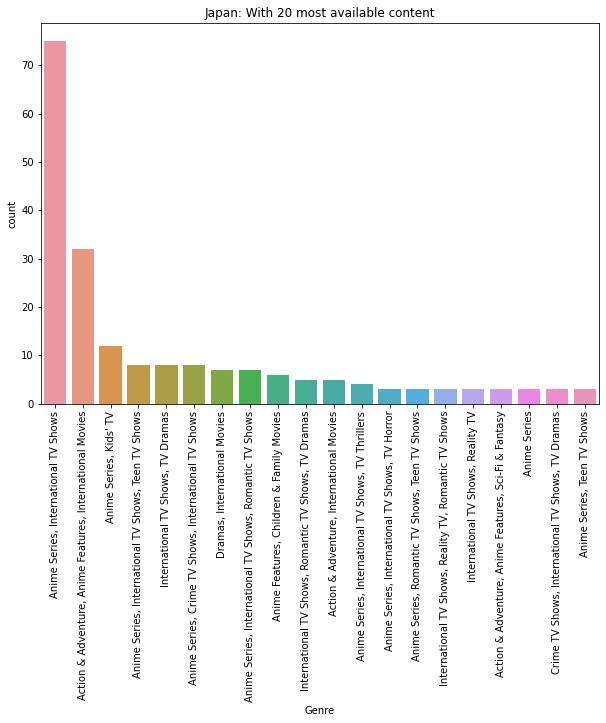

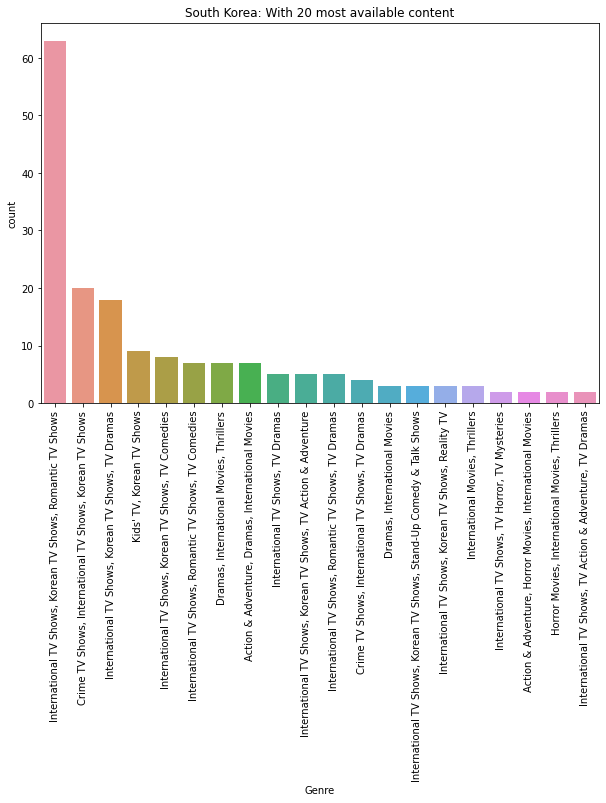

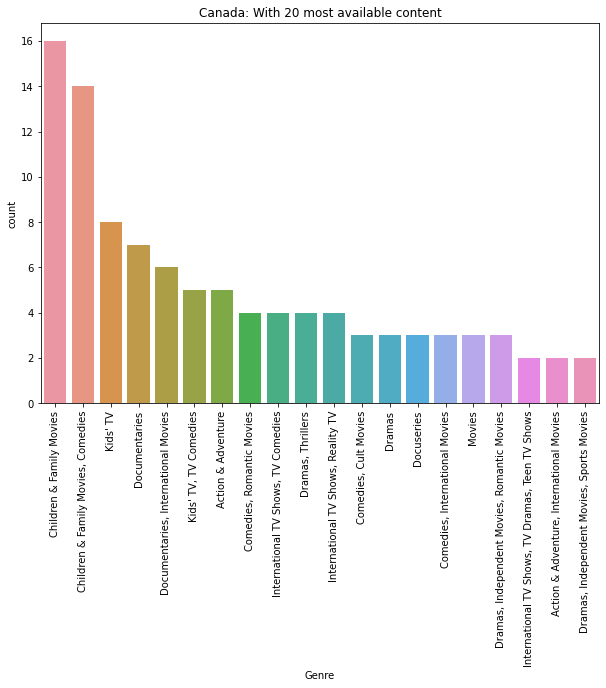

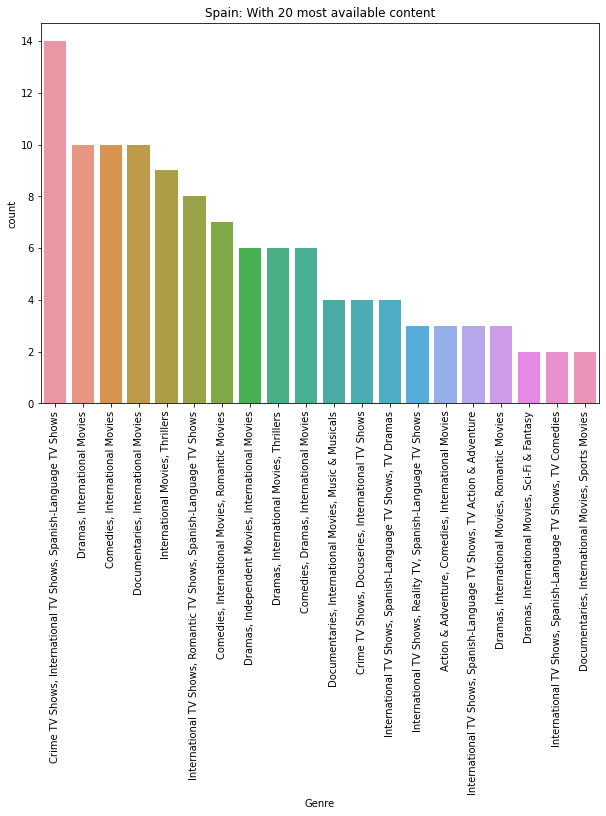

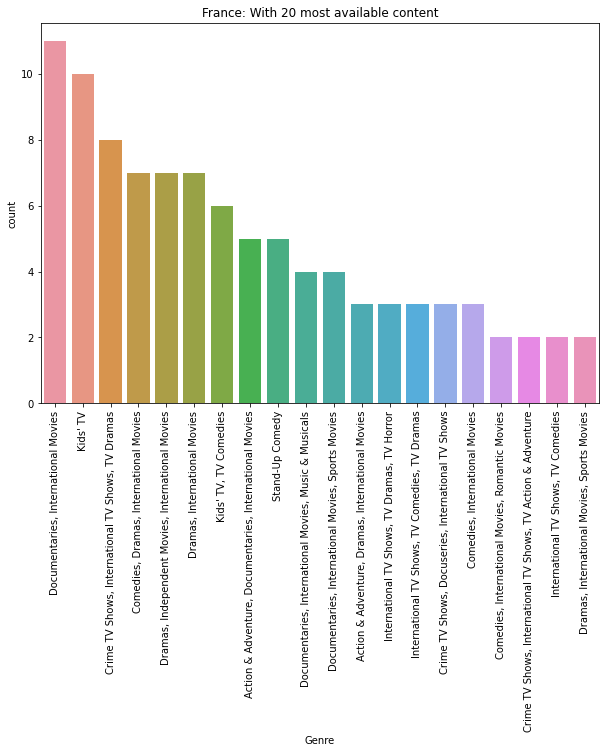

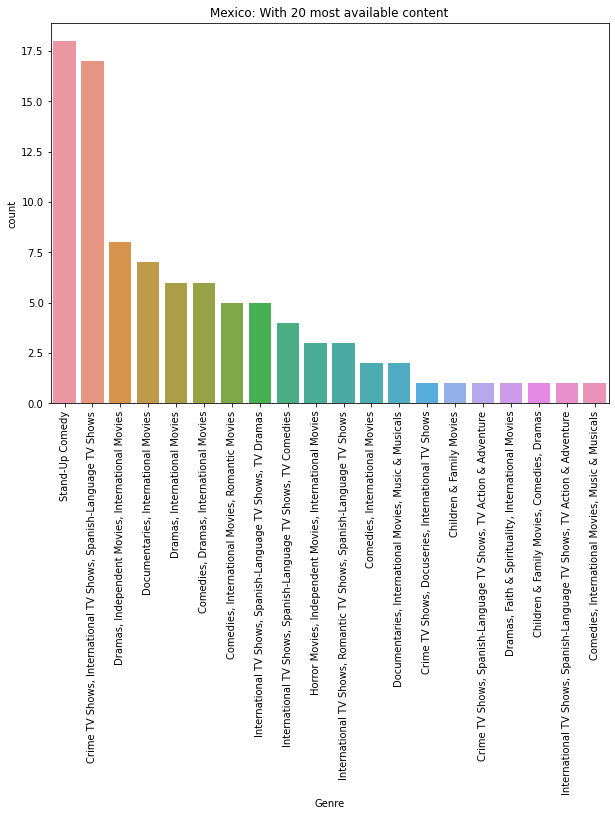

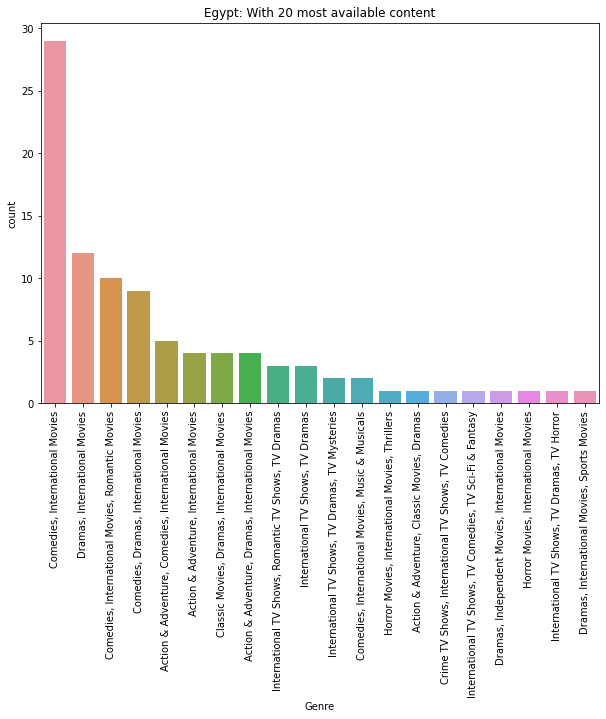

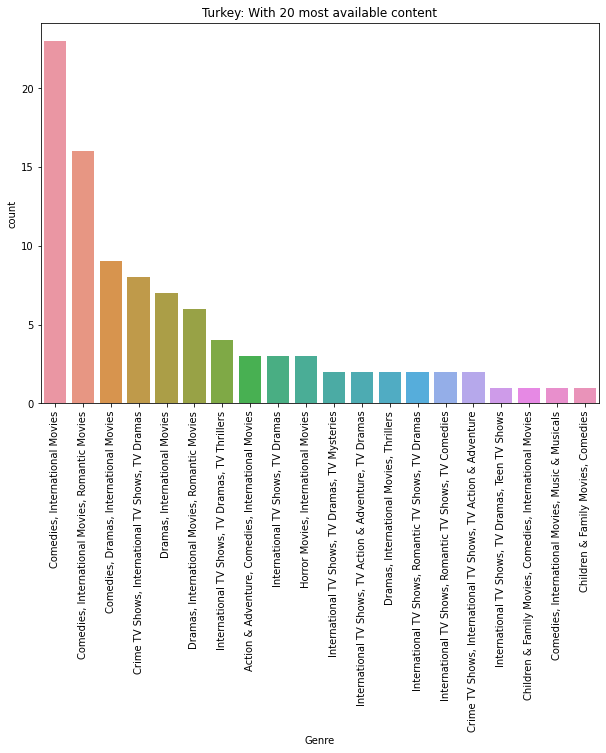

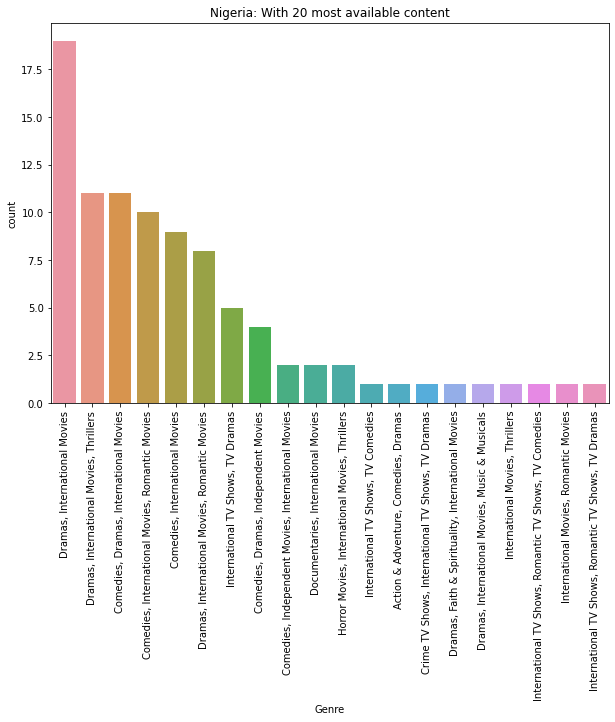

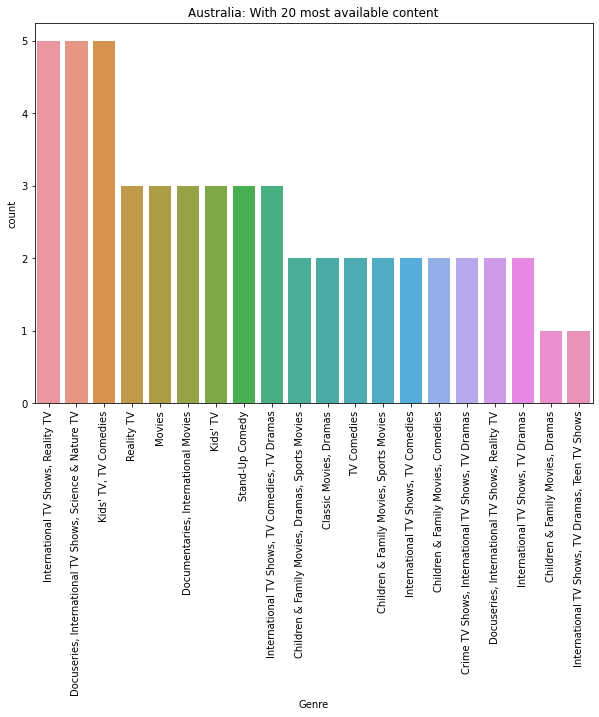

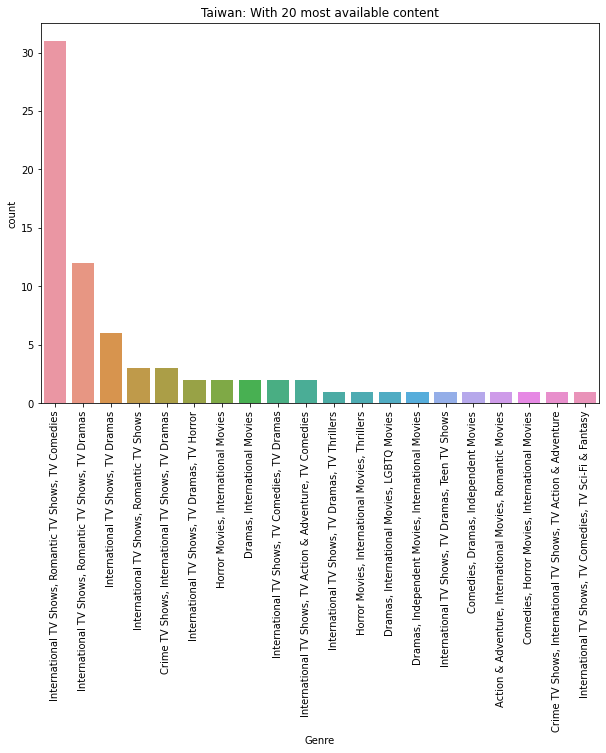

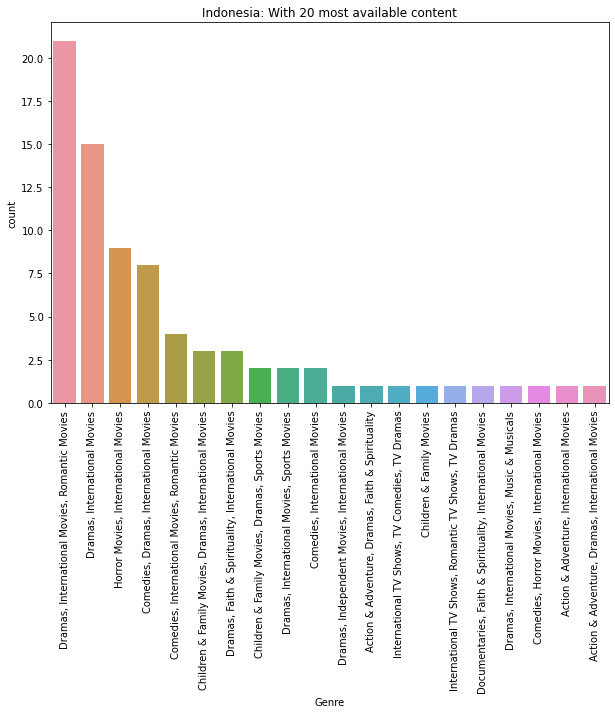

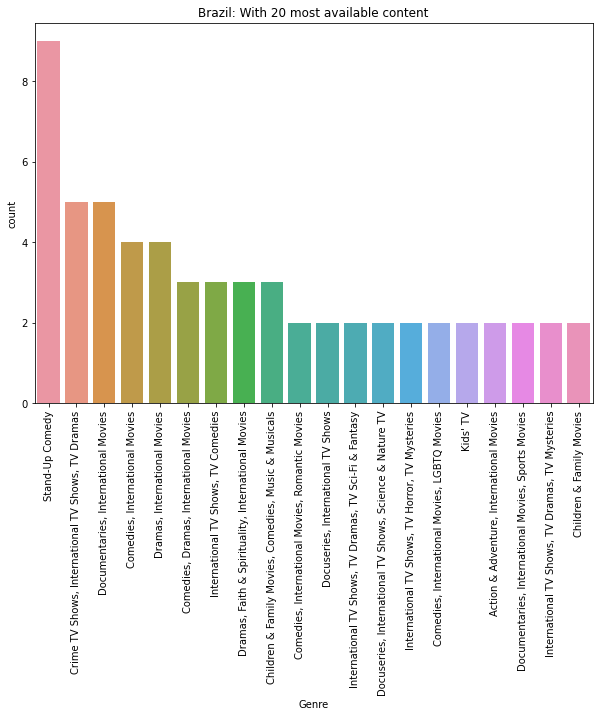

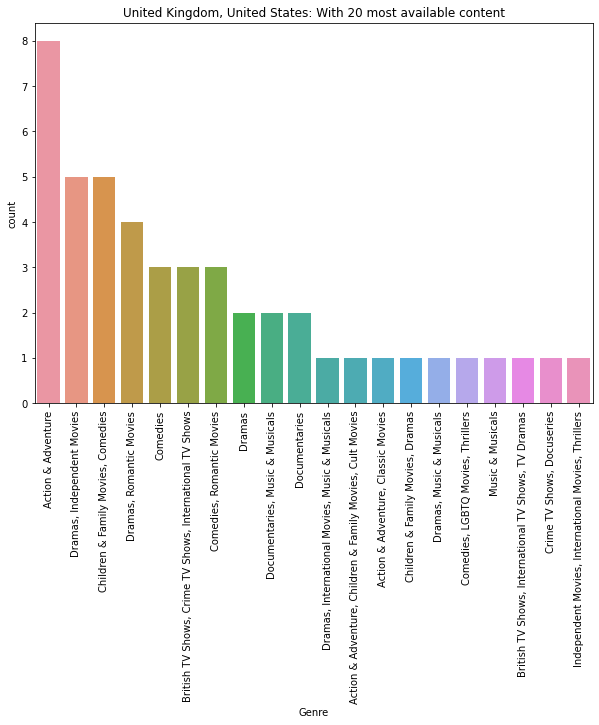

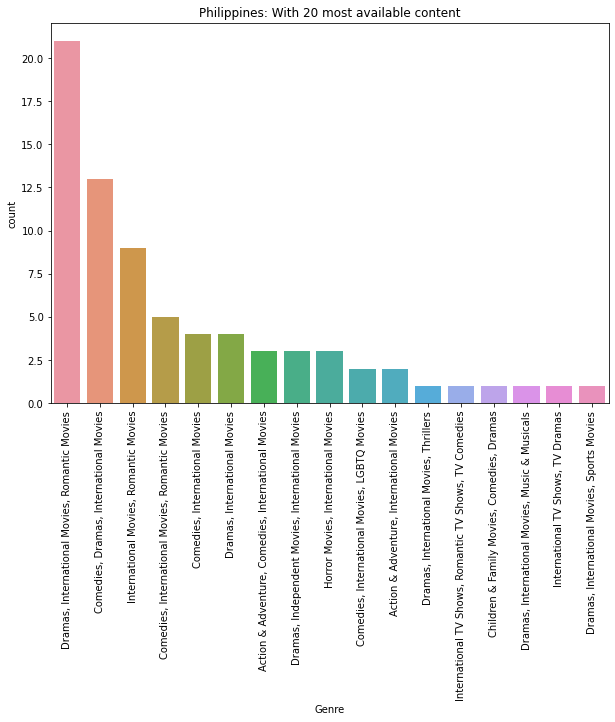

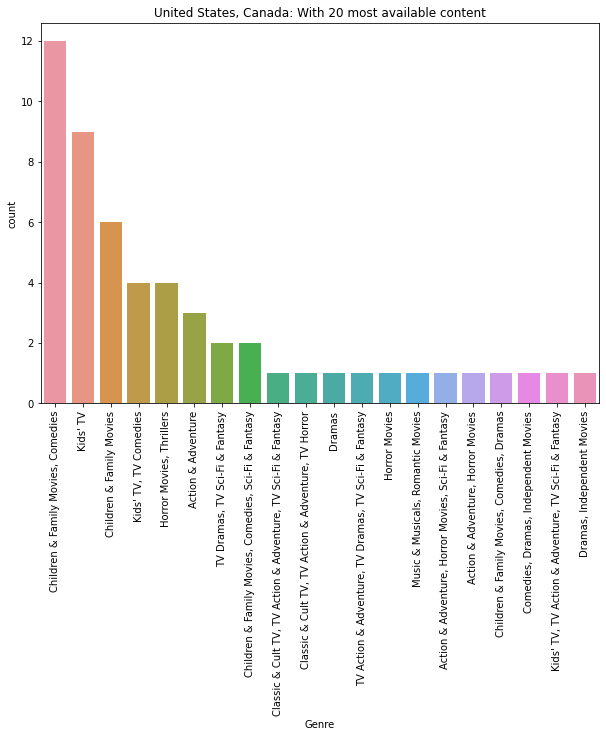

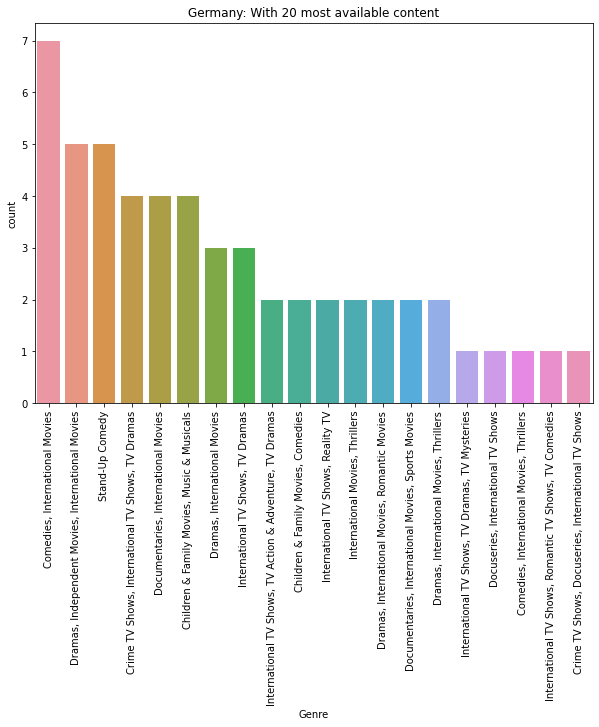

In [ ]:
top_20_countries=most_produced['country'].to_list()[:20]
for country in top_20_countries:
  plt.figure(figsize=(10,7))
  data_country=data[data['country']==country]['listed_in'].value_counts().sort_values(ascending=False).reset_index().head(20)
  sns.barplot(x='index',y='listed_in',data=data_country)
  plt.xlabel('Genre')
  plt.ylabel('count')
  plt.title(f'{country}: With 20 most available content')
  ax=plt.gca()
  ax.set_xticklabels(data_country['index'],rotation=90)
  plt.savefig(f"{country}geners.jpg")


# Number of movies released over the last 20-30 years

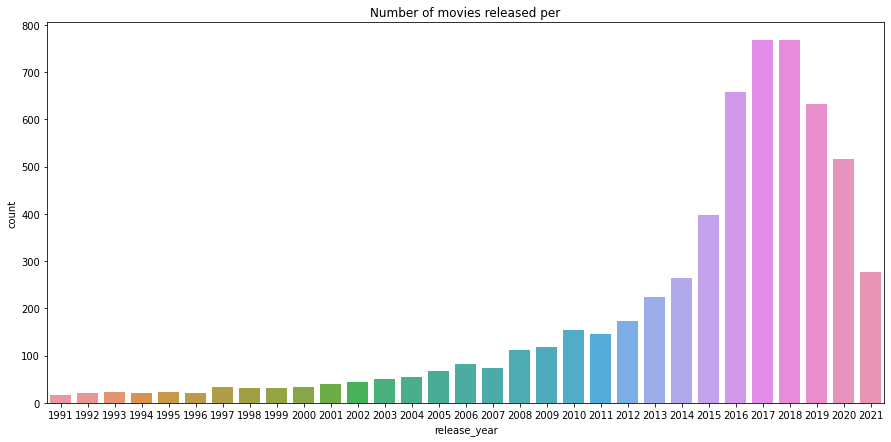

In [ ]:
# number of movie released over the last 20-30 years
plt.figure(figsize=(15,7))
sns.countplot(x='release_year',data=data[(data['type']=='Movie') & (data['release_year']>1990)])
plt.title('Number of movies released per')
plt.savefig("moviereleased20years.jpg")
plt.show()

# Rating:For movie as well as TV shows

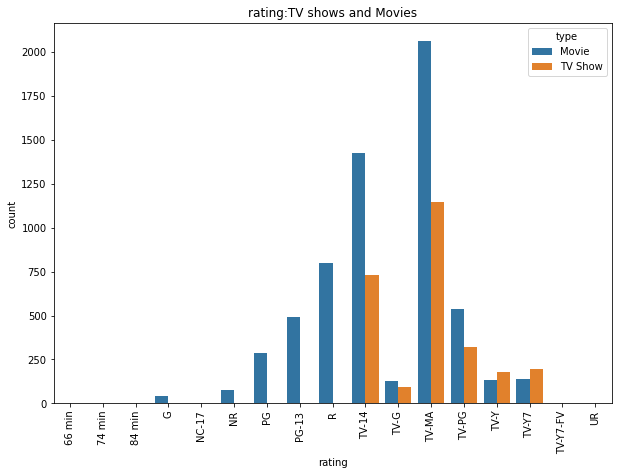

In [ ]:
plt.figure(figsize=(10,7))
plot=sns.countplot(x='rating',hue='type',data=data)
ticklabels=plot.get_xticklabels()
ax=plt.gca()
ax.set_xticklabels(ticklabels,rotation=90)
plt.title('rating:TV shows and Movies')
plt.savefig("ratingmovishows.jpg")
plt.show()

# Outlier detection in duration using boxplot

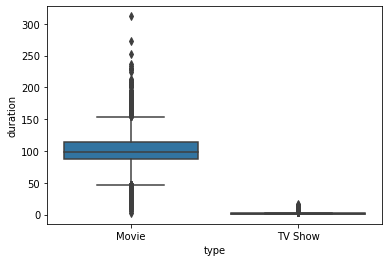

In [ ]:
plt.figure()
sns.boxplot(x='type',y='duration_numeric',data=data)
plt.ylabel('duration')
plt.savefig("outlierduration.jpg")
plt.show()

In [ ]:
# movies which are 312 minutes long
print("Movie that is 312 minutes long:",data[data['duration_numeric']==312]['title'].to_list()[0])
# tv shows
print("TV Shows that is 17 seasons long:",data[(data['duration_numeric']==17)&(data['type']=='TV Show')]['title'].to_list()[0])


Movie that is 312 minutes long: Black Mirror: Bandersnatch
TV Shows that is 17 seasons long: Grey's Anatomy


# Distribution of duration

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


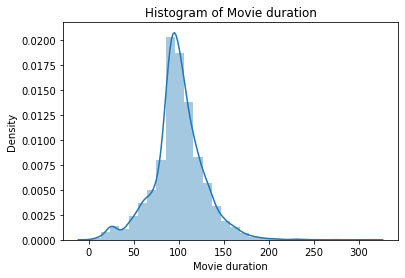

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


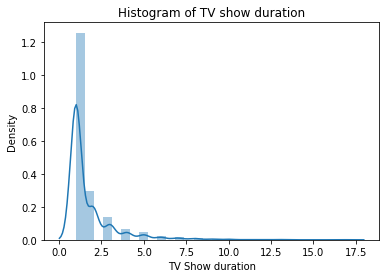

In [ ]:
# distribution plot for duration w.r.t movies as well as tv shows
plt.figure()
sns.distplot(x=data[data['type']=='Movie']['duration_numeric'],bins=30)
plt.title('Histogram of Movie duration')
plt.xlabel('Movie duration')
plt.show()
plt.figure()
sns.distplot(x=data[data['type']=='TV Show']['duration_numeric'],bins=30)
plt.title('Histogram of TV show duration')
plt.xlabel('TV Show duration')
plt.show()

# Relation between directors and Genres

In [ ]:
# Relation between director and genres(Movies)
data_dir=data[data['type']=='Movie']
print("Relation between a director and movie genres:")
data_dir=data_dir.groupby(['director','listed_in']).size().sort_values(ascending=False)
print()
print(data_dir.head(50))

Relation between a director and movie genres:

director                listed_in                                               
Rajiv Chilaka           Children & Family Movies                                    18
Raúl Campos, Jan Suter  Stand-Up Comedy                                             18
Marcus Raboy            Stand-Up Comedy                                             15
Jay Karas               Stand-Up Comedy                                             13
Jay Chapman             Stand-Up Comedy                                             11
Shannon Hartman         Stand-Up Comedy                                              8
Ryan Polito             Stand-Up Comedy                                              7
Lance Bangs             Stand-Up Comedy                                              7
S.S. Rajamouli          Action & Adventure, Dramas, International Movies             7
Toshiya Shinohara       Action & Adventure, Anime Features, International Movies     7
Pr

# All the below codes are just for experimentation: I don't know whether they are okay for this case study or not .But out of curiosity I did all these things.If you think these are good then have a look at them otherwise please don't consider these for evaluation

# Kind of contents availabel to each country
Consider countries which has minimum 10 number of movies available.

And similarly consider countries which has minimum 10 number of shows.


In [ ]:
tv_shows=data[data['type']=='TV Show']['country']
movies=data[data['type']=='Movie']['country']

tv_shows=tv_shows.str.strip().str.split(",").explode()
movies=movies.str.strip().str.split(",").explode()

tv_shows=tv_shows.str.strip().value_counts().sort_values(ascending=False)
movies=movies.str.strip().value_counts().sort_values(ascending=False)

In [ ]:
country_genres=data[['type','country','Genre']]
country_genres=country_genres.assign(country=country_genres['country'].str.split(",")).explode('country')
country_genres['country']=country_genres['country'].str.strip()
country_with_min_10_movies=movies[movies>=10]
country_with_min_10_shows=tv_shows[tv_shows>=10]

# movie genres
movie_genres=country_genres[country_genres['type']=='Movie']

for country in country_with_min_10_movies.index:
  print("Country Name:",country)
  print("Number of movies available:",movies[country])
  print("Number of different genres avilabel:")
  print(movie_genres[movie_genres['country']==country]['Genre'].value_counts())
  print()

Country Name: United States
Number of movies available: 2752
Number of different genres avilabel:
Documentaries               309
Comedies                    298
Thrillers                   292
Dramas                      240
Independent Movies          237
Stand-Up Comedy             216
Romantic Movies             214
Sci-Fi & Fantasy            155
Music & Musicals            134
Sports Movies               113
International Movies        112
Action & Adventure          111
Children & Family Movies    105
Horror Movies                76
LGBTQ Movies                 56
Faith & Spirituality         32
Movies                       22
Cult Movies                  20
Classic Movies               10
Name: Genre, dtype: int64

Country Name: India
Number of movies available: 962
Number of different genres avilabel:
International Movies        541
Romantic Movies             118
Thrillers                    92
Music & Musicals             88
Independent Movies           34
Dramas            

In [ ]:
# similarly for tv shows
# tv show genres
tv_genres=country_genres[country_genres['type']=='TV Show']
for country in country_with_min_10_shows.index:
  print("Country Name:",country)
  print("Number of tv shows availabel:",tv_shows[country])
  print("Number of different genres avilabel:")
  print(tv_genres[tv_genres['country']==country]['Genre'].value_counts())
  print()

Country Name: United States
Number of tv shows availabel: 938
Number of different genres avilabel:
TV Comedies                     178
TV Dramas                       147
Kids' TV                        125
Docuseries                      109
Reality TV                       93
TV Sci-Fi & Fantasy              57
Science & Nature TV              45
Teen TV Shows                    33
TV Mysteries                     32
TV Thrillers                     27
International TV Shows           20
Spanish-Language TV Shows        18
TV Horror                        13
TV Action & Adventure            13
Stand-Up Comedy & Talk Shows      8
Romantic TV Shows                 8
Anime Series                      5
TV Shows                          4
Korean TV Shows                   2
Crime TV Shows                    1
Name: Genre, dtype: int64

Country Name: United Kingdom
Number of tv shows availabel: 272
Number of different genres avilabel:
International TV Shows          54
TV Comedies        

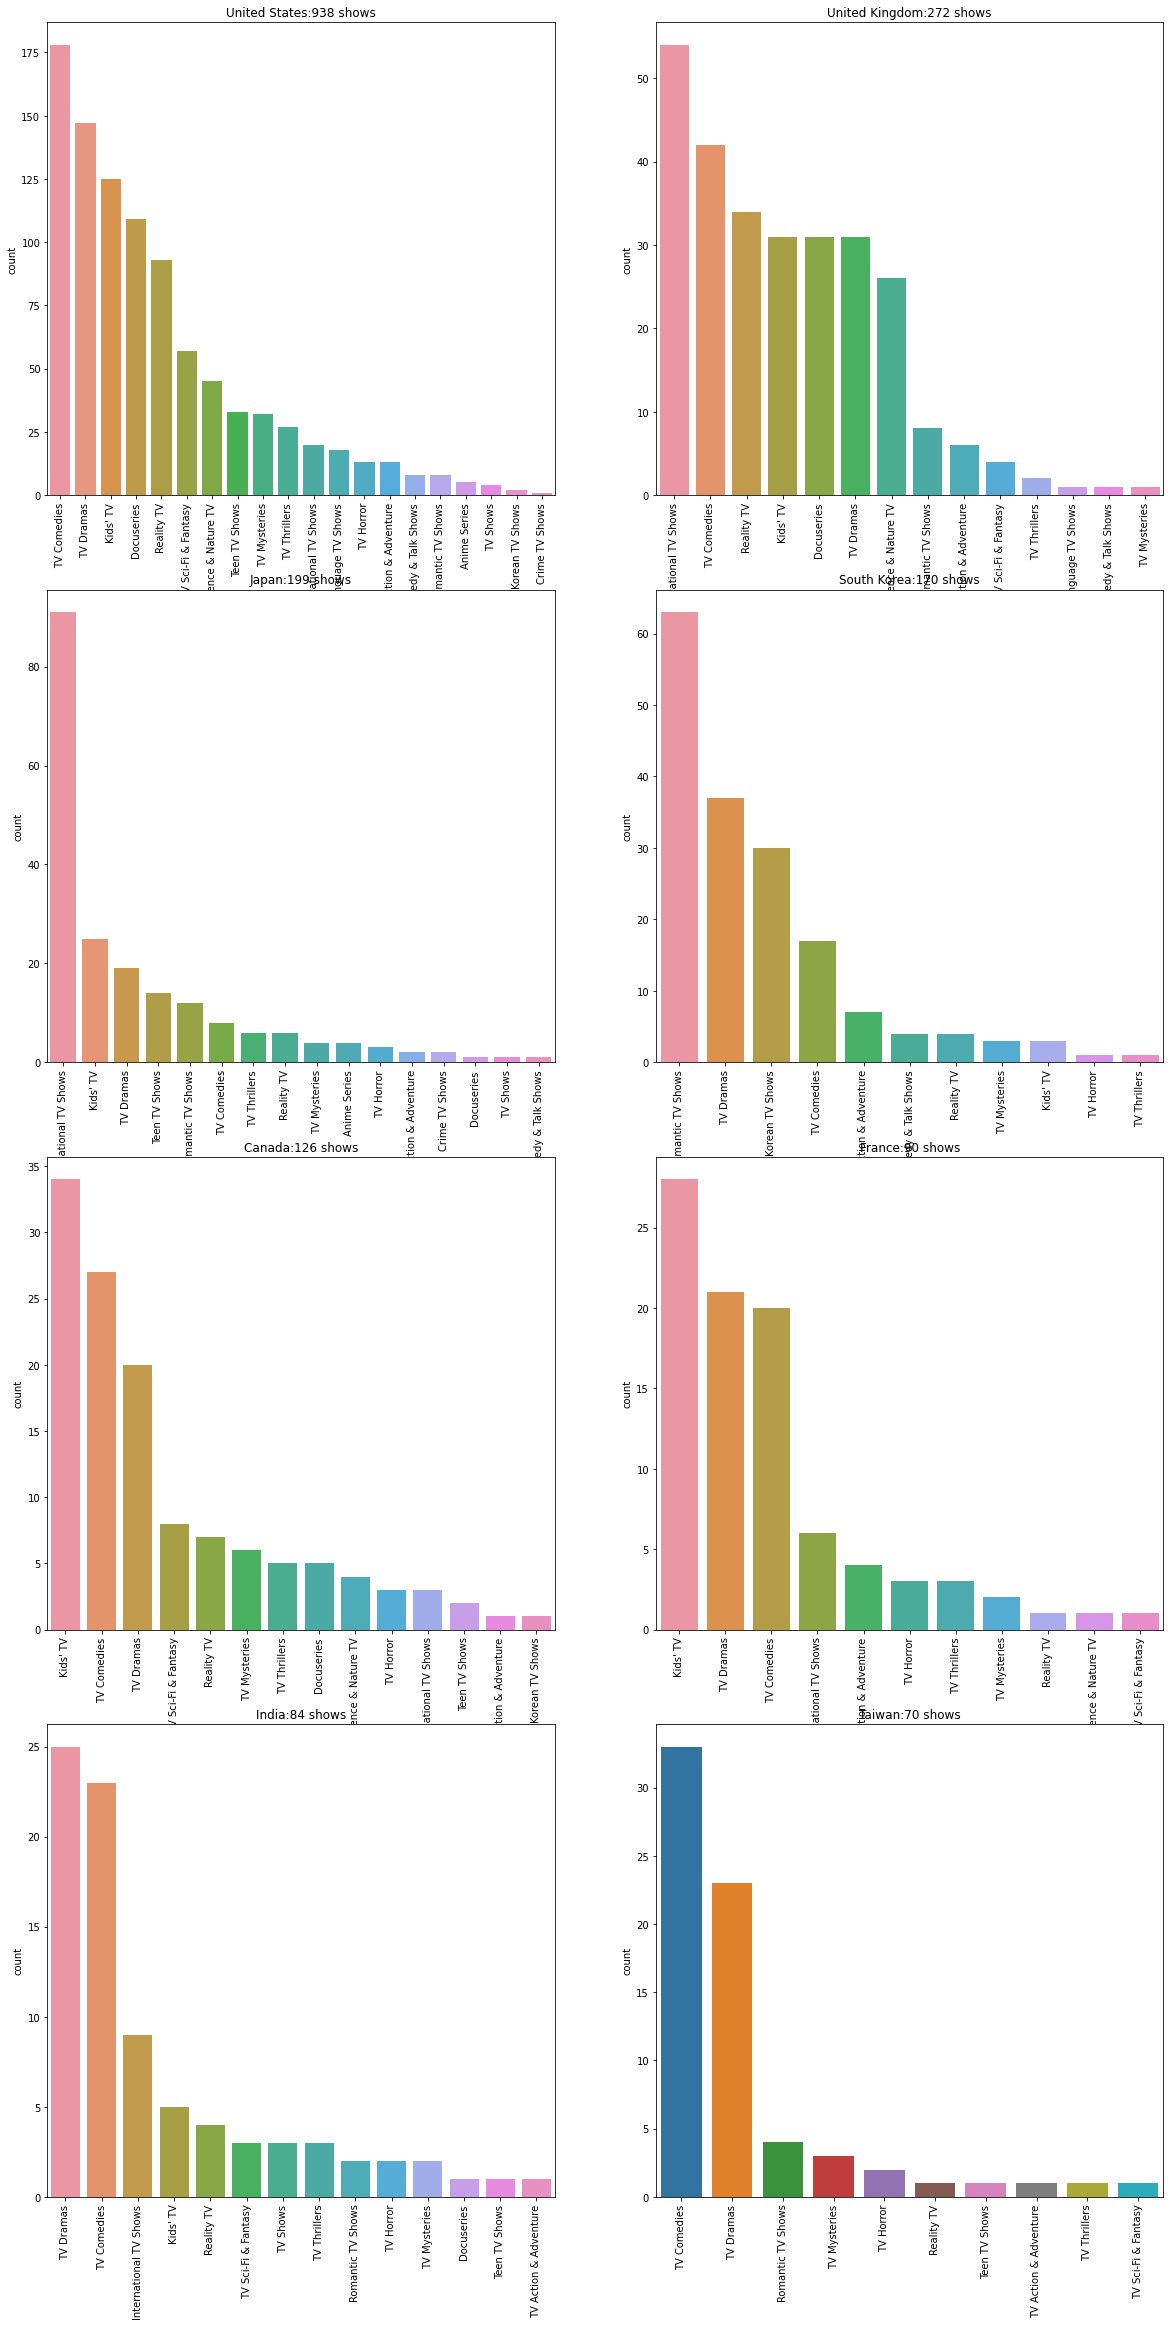

In [ ]:
# different Kind of contents for countries which has minimum 10 shows
tv_genres=country_genres[country_genres['type']=='TV Show']
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(20,40))
ax=ax.flatten()
for i,country in enumerate(country_with_min_10_shows.index[:8]):
  genres=tv_genres[tv_genres['country']==country]['Genre'].value_counts().sort_values(ascending=False)
  #genres.plot(ax=ax[i],kind='bar',grid=True)
  sns.barplot(ax=ax[i],x=genres.index.to_list(),y=genres.to_list())
  ax[i].set_title(f"{country}:{tv_shows[country]} shows")
  ax[i].set_ylabel('count')
  labels=genres.index.to_list()
  #ax[i].set_xticks(range(-1,len(labels)-1))
  ax[i].set_xticklabels(labels,rotation=90)


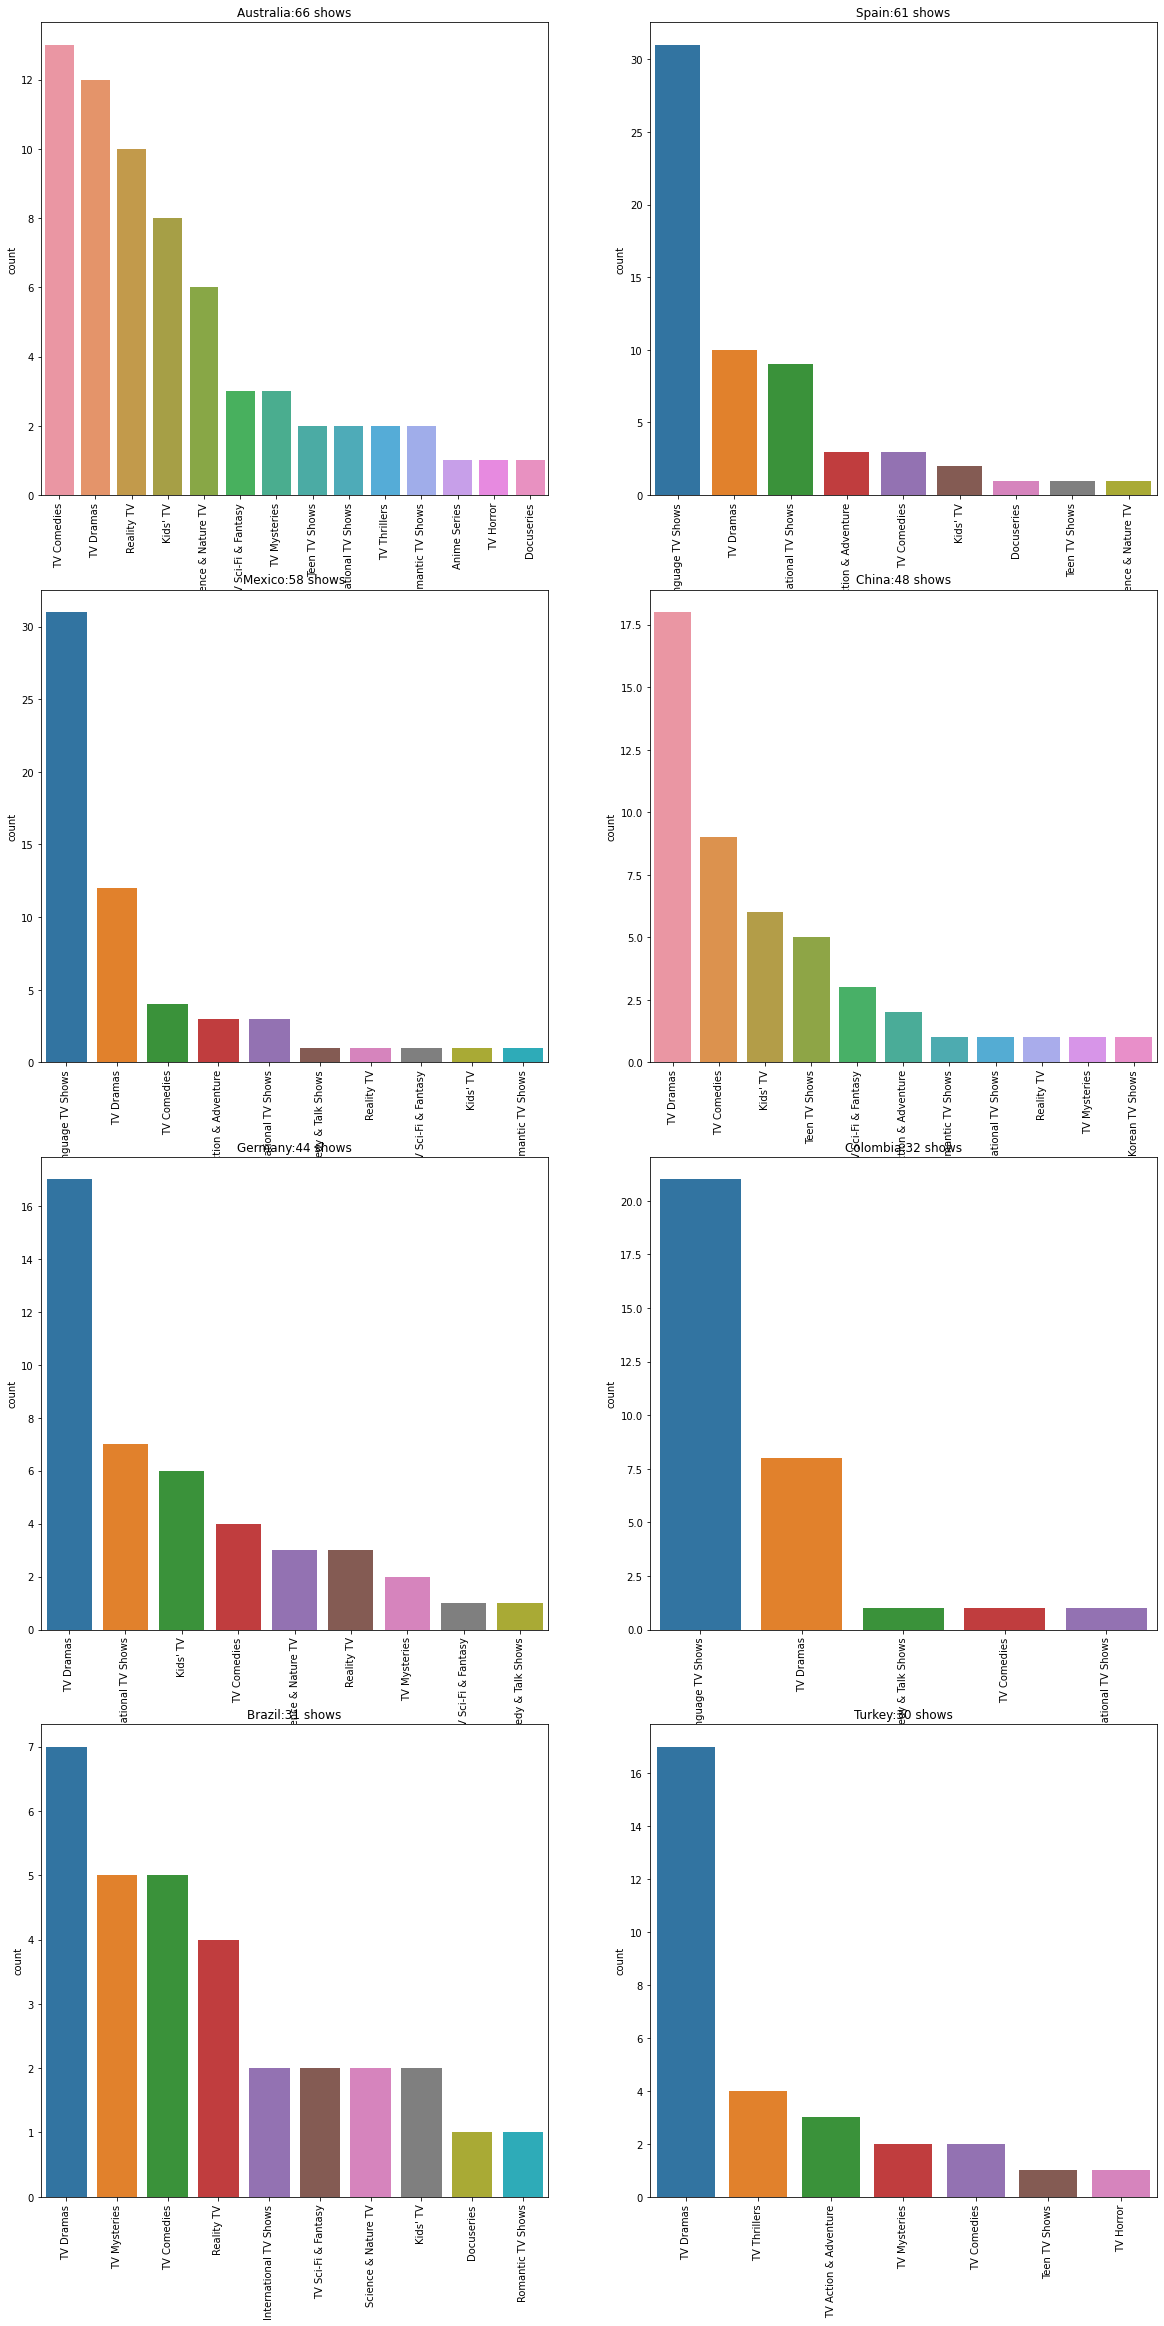

In [ ]:
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(20,40))
ax=ax.flatten()
for i,country in enumerate(country_with_min_10_shows.index[8:16]):
  genres=tv_genres[tv_genres['country']==country]['Genre'].value_counts().sort_values(ascending=False)
  #genres.plot(ax=ax[i],kind='bar',grid=True)
  sns.barplot(ax=ax[i],x=genres.index.to_list(),y=genres.to_list())
  ax[i].set_title(f"{country}:{tv_shows[country]} shows")
  ax[i].set_ylabel('count')
  labels=genres.index.to_list()
  #ax[i].set_xticks(range(-1,len(labels)-1))
  ax[i].set_xticklabels(labels,rotation=90)

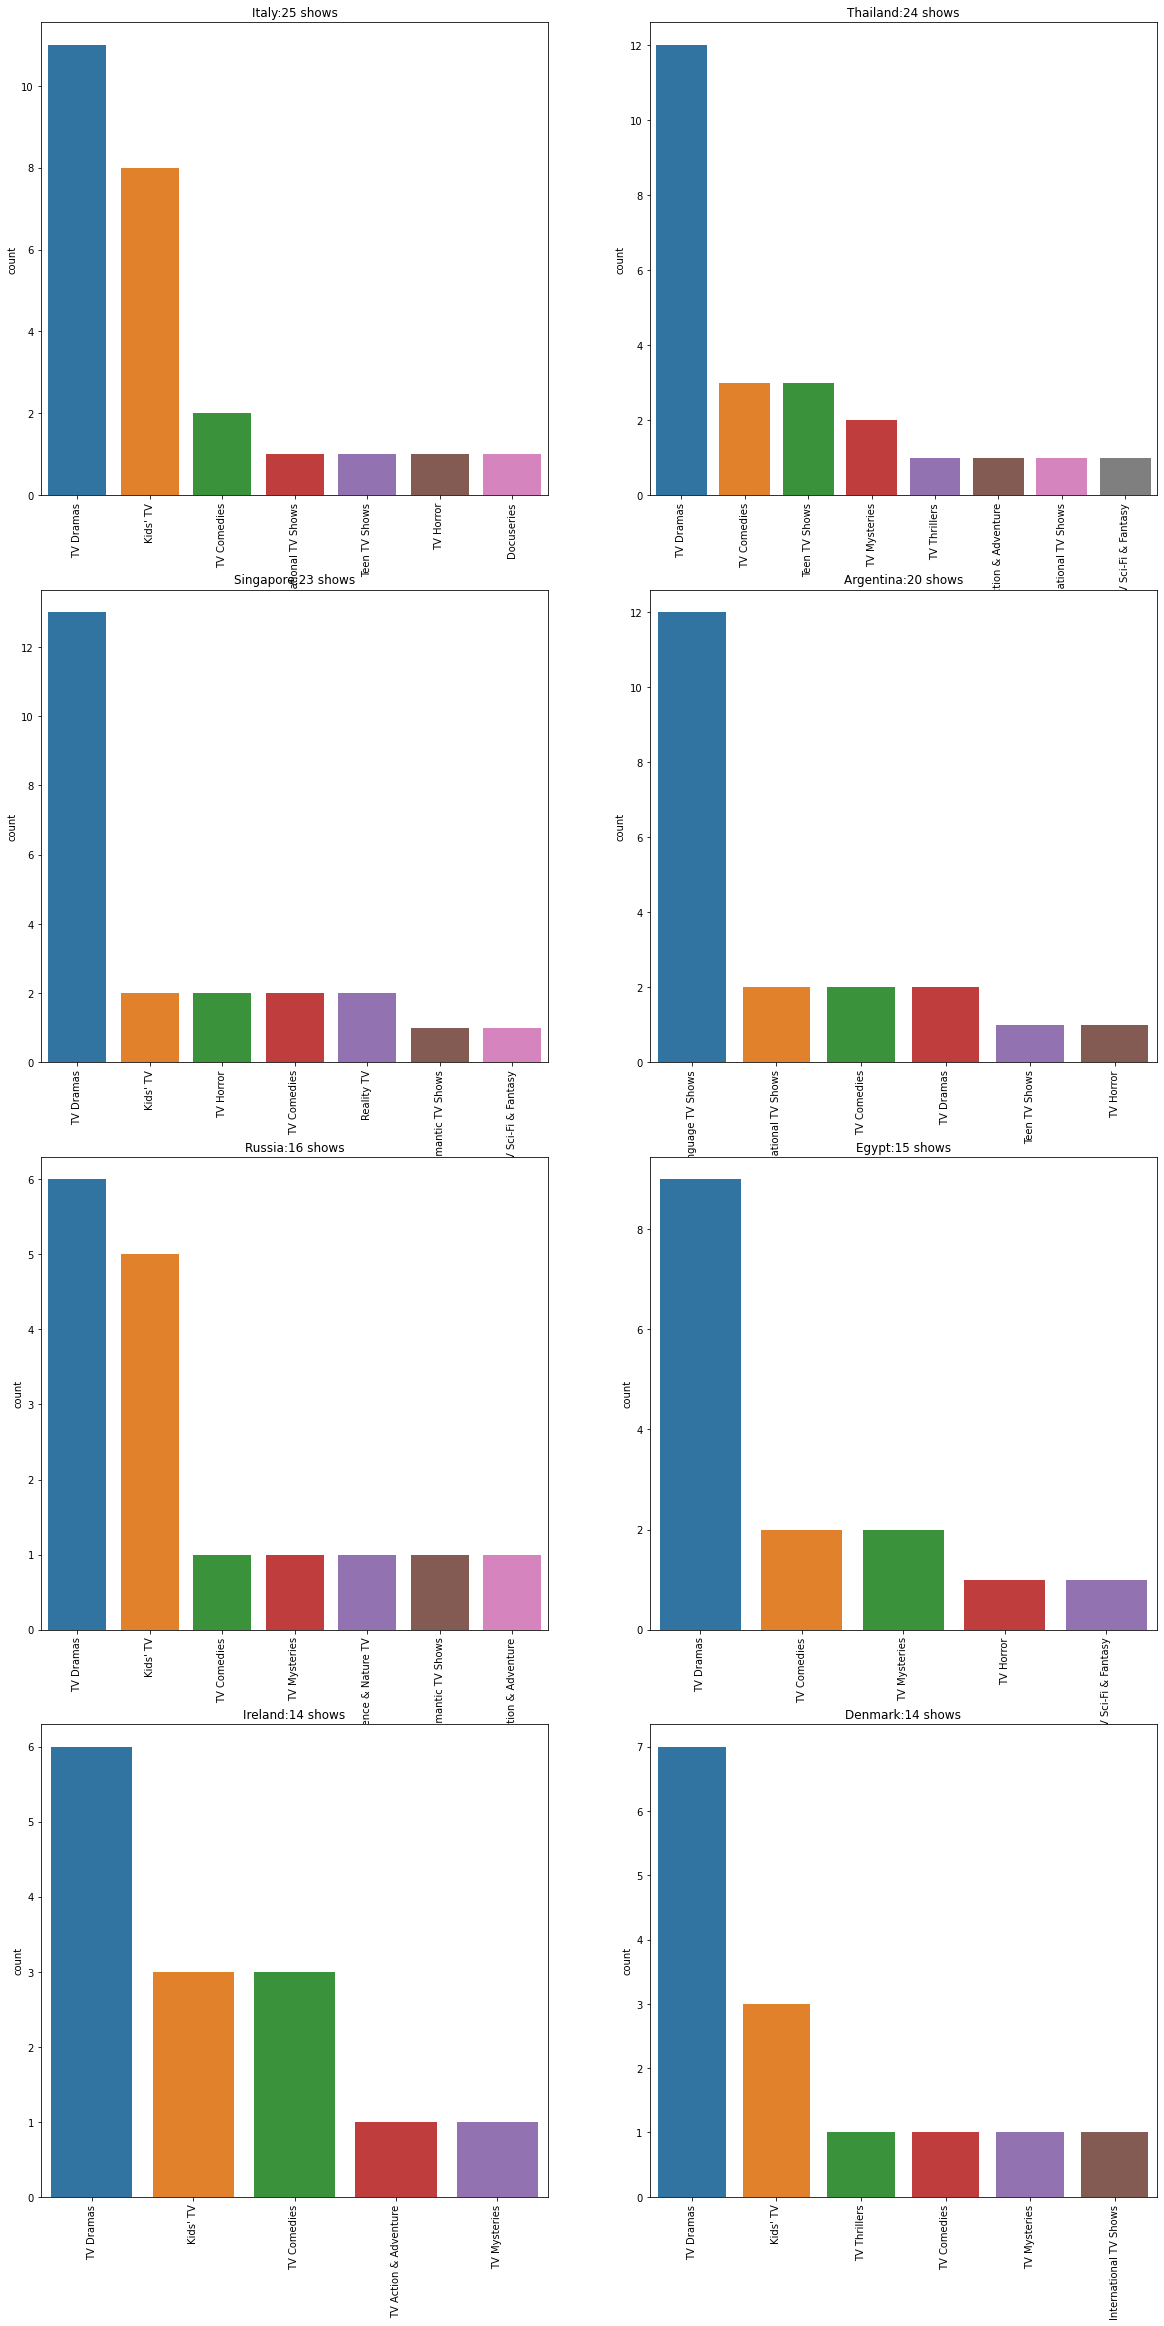

In [ ]:
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(20,40))
ax=ax.flatten()
for i,country in enumerate(country_with_min_10_shows.index[16:24]):
  genres=tv_genres[tv_genres['country']==country]['Genre'].value_counts().sort_values(ascending=False)
  #genres.plot(ax=ax[i],kind='bar',grid=True)
  sns.barplot(ax=ax[i],x=genres.index.to_list(),y=genres.to_list())
  ax[i].set_title(f"{country}:{tv_shows[country]} shows")
  ax[i].set_ylabel('count')
  labels=genres.index.to_list()
  #ax[i].set_xticks(range(-1,len(labels)-1))
  ax[i].set_xticklabels(labels,rotation=90)

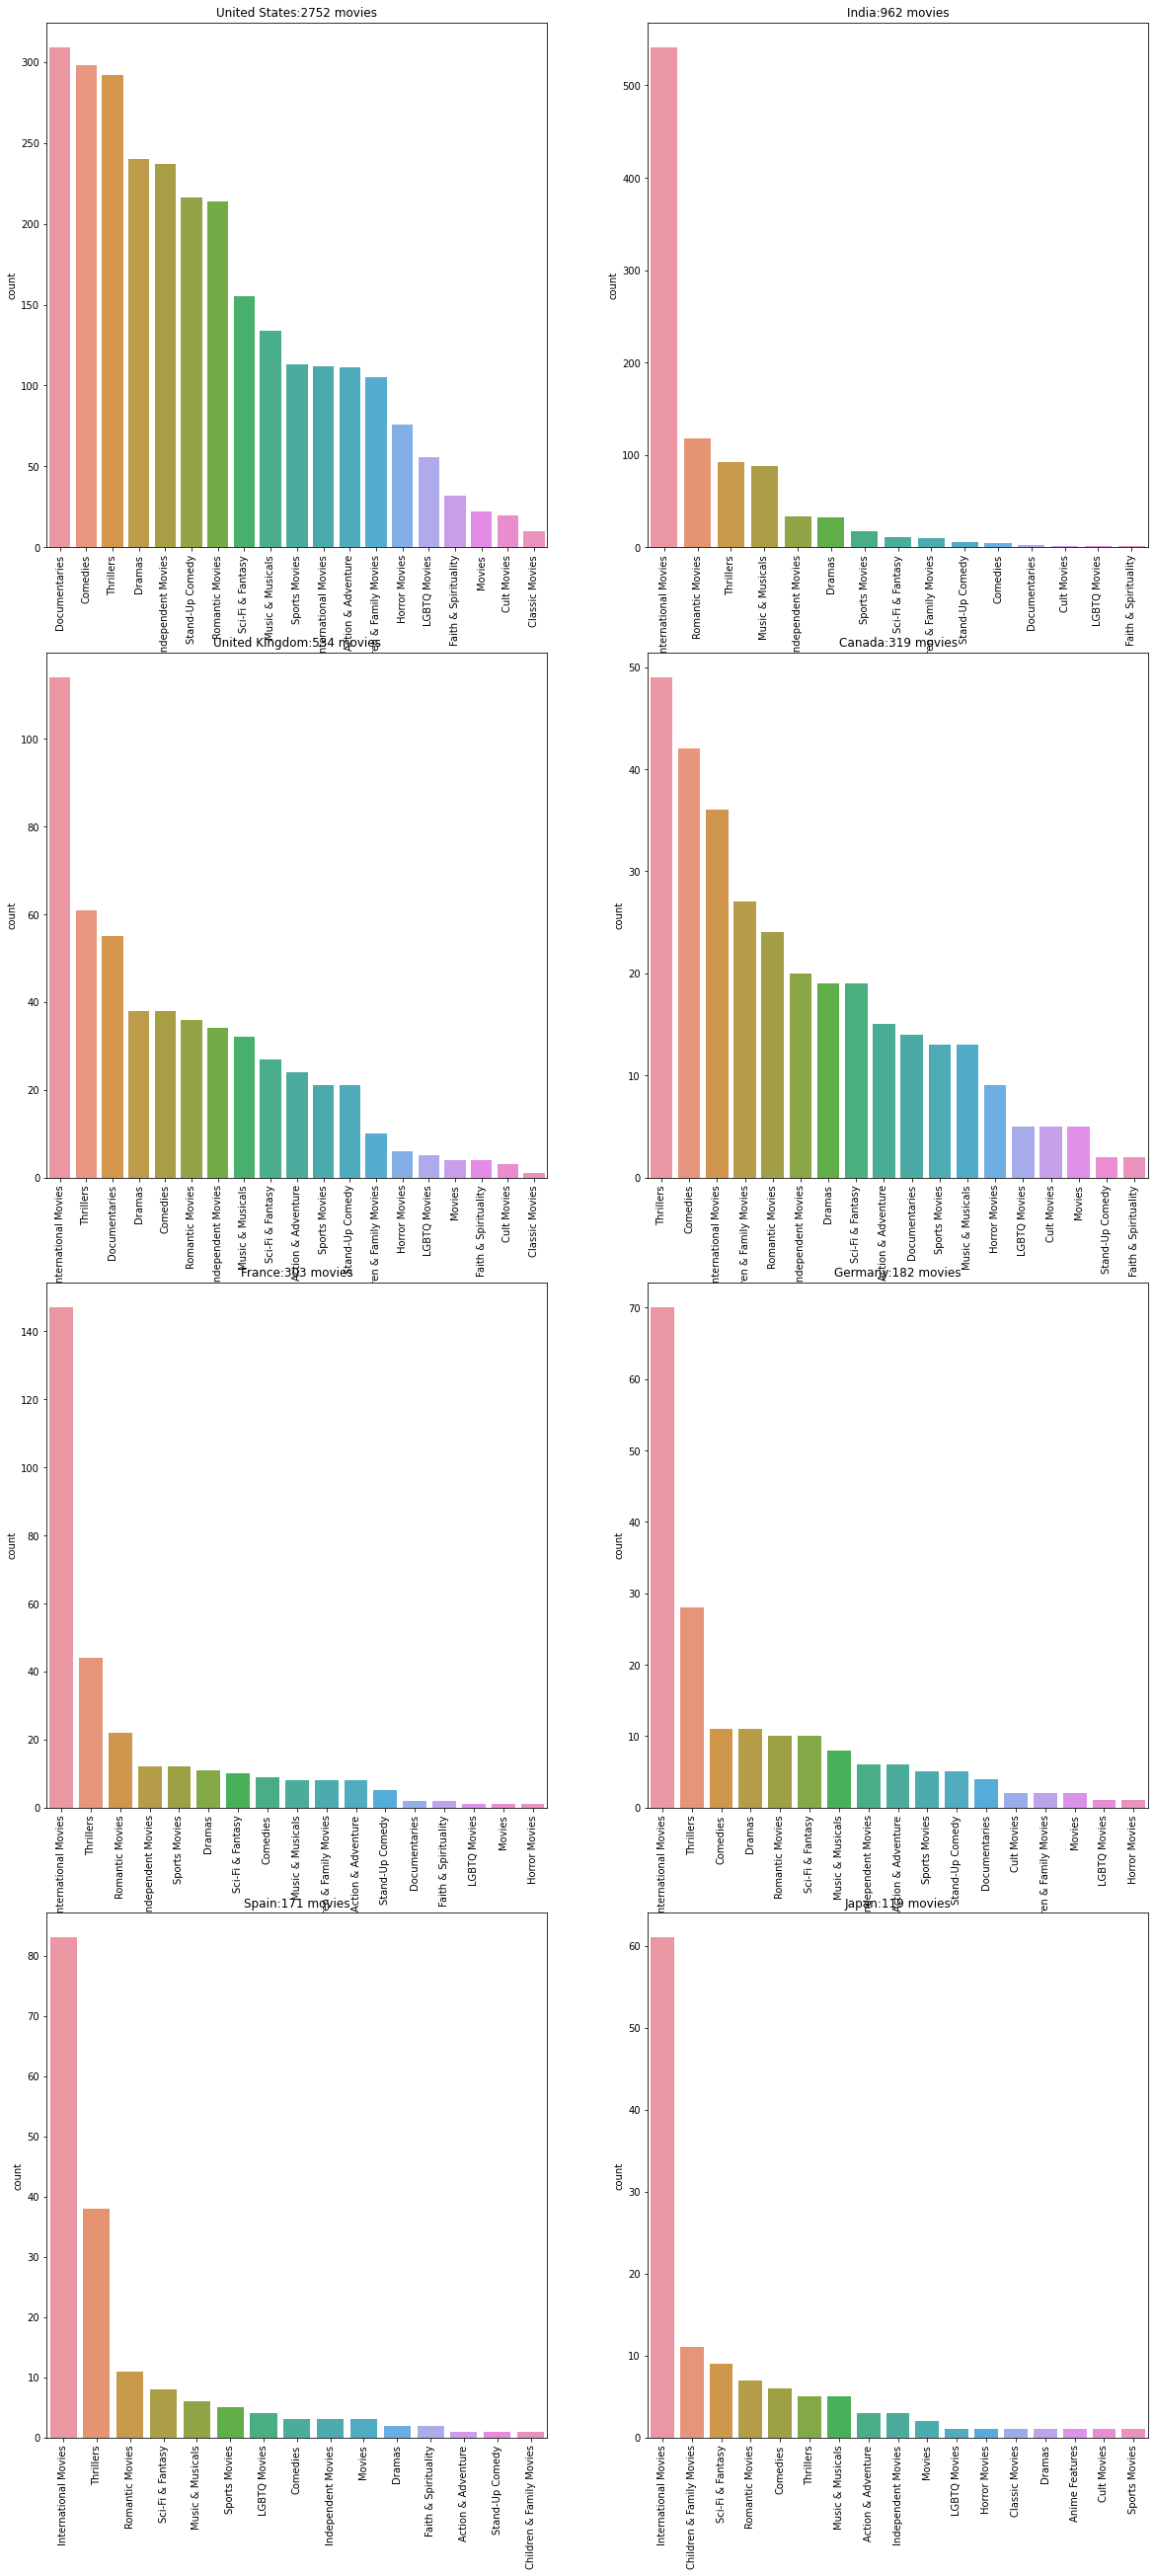

In [ ]:
# different Kind of contents for countries which has minimum 10 movies
movie_genres=country_genres[country_genres['type']=='Movie']
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(20,45))
ax=ax.flatten()
for i,country in enumerate(country_with_min_10_movies.index[:8]):
  genres=movie_genres[movie_genres['country']==country]['Genre'].value_counts().sort_values(ascending=False)
  #genres.plot(ax=ax[i],kind='bar',grid=True)
  sns.barplot(ax=ax[i],x=genres.index.to_list(),y=genres.to_list())
  ax[i].set_title(f"{country}:{movies[country]} movies")
  ax[i].set_ylabel('count')
  labels=genres.index.to_list()
  #ax[i].set_xticks(range(-1,len(labels)-1))
  ax[i].set_xticklabels(labels,rotation=90)


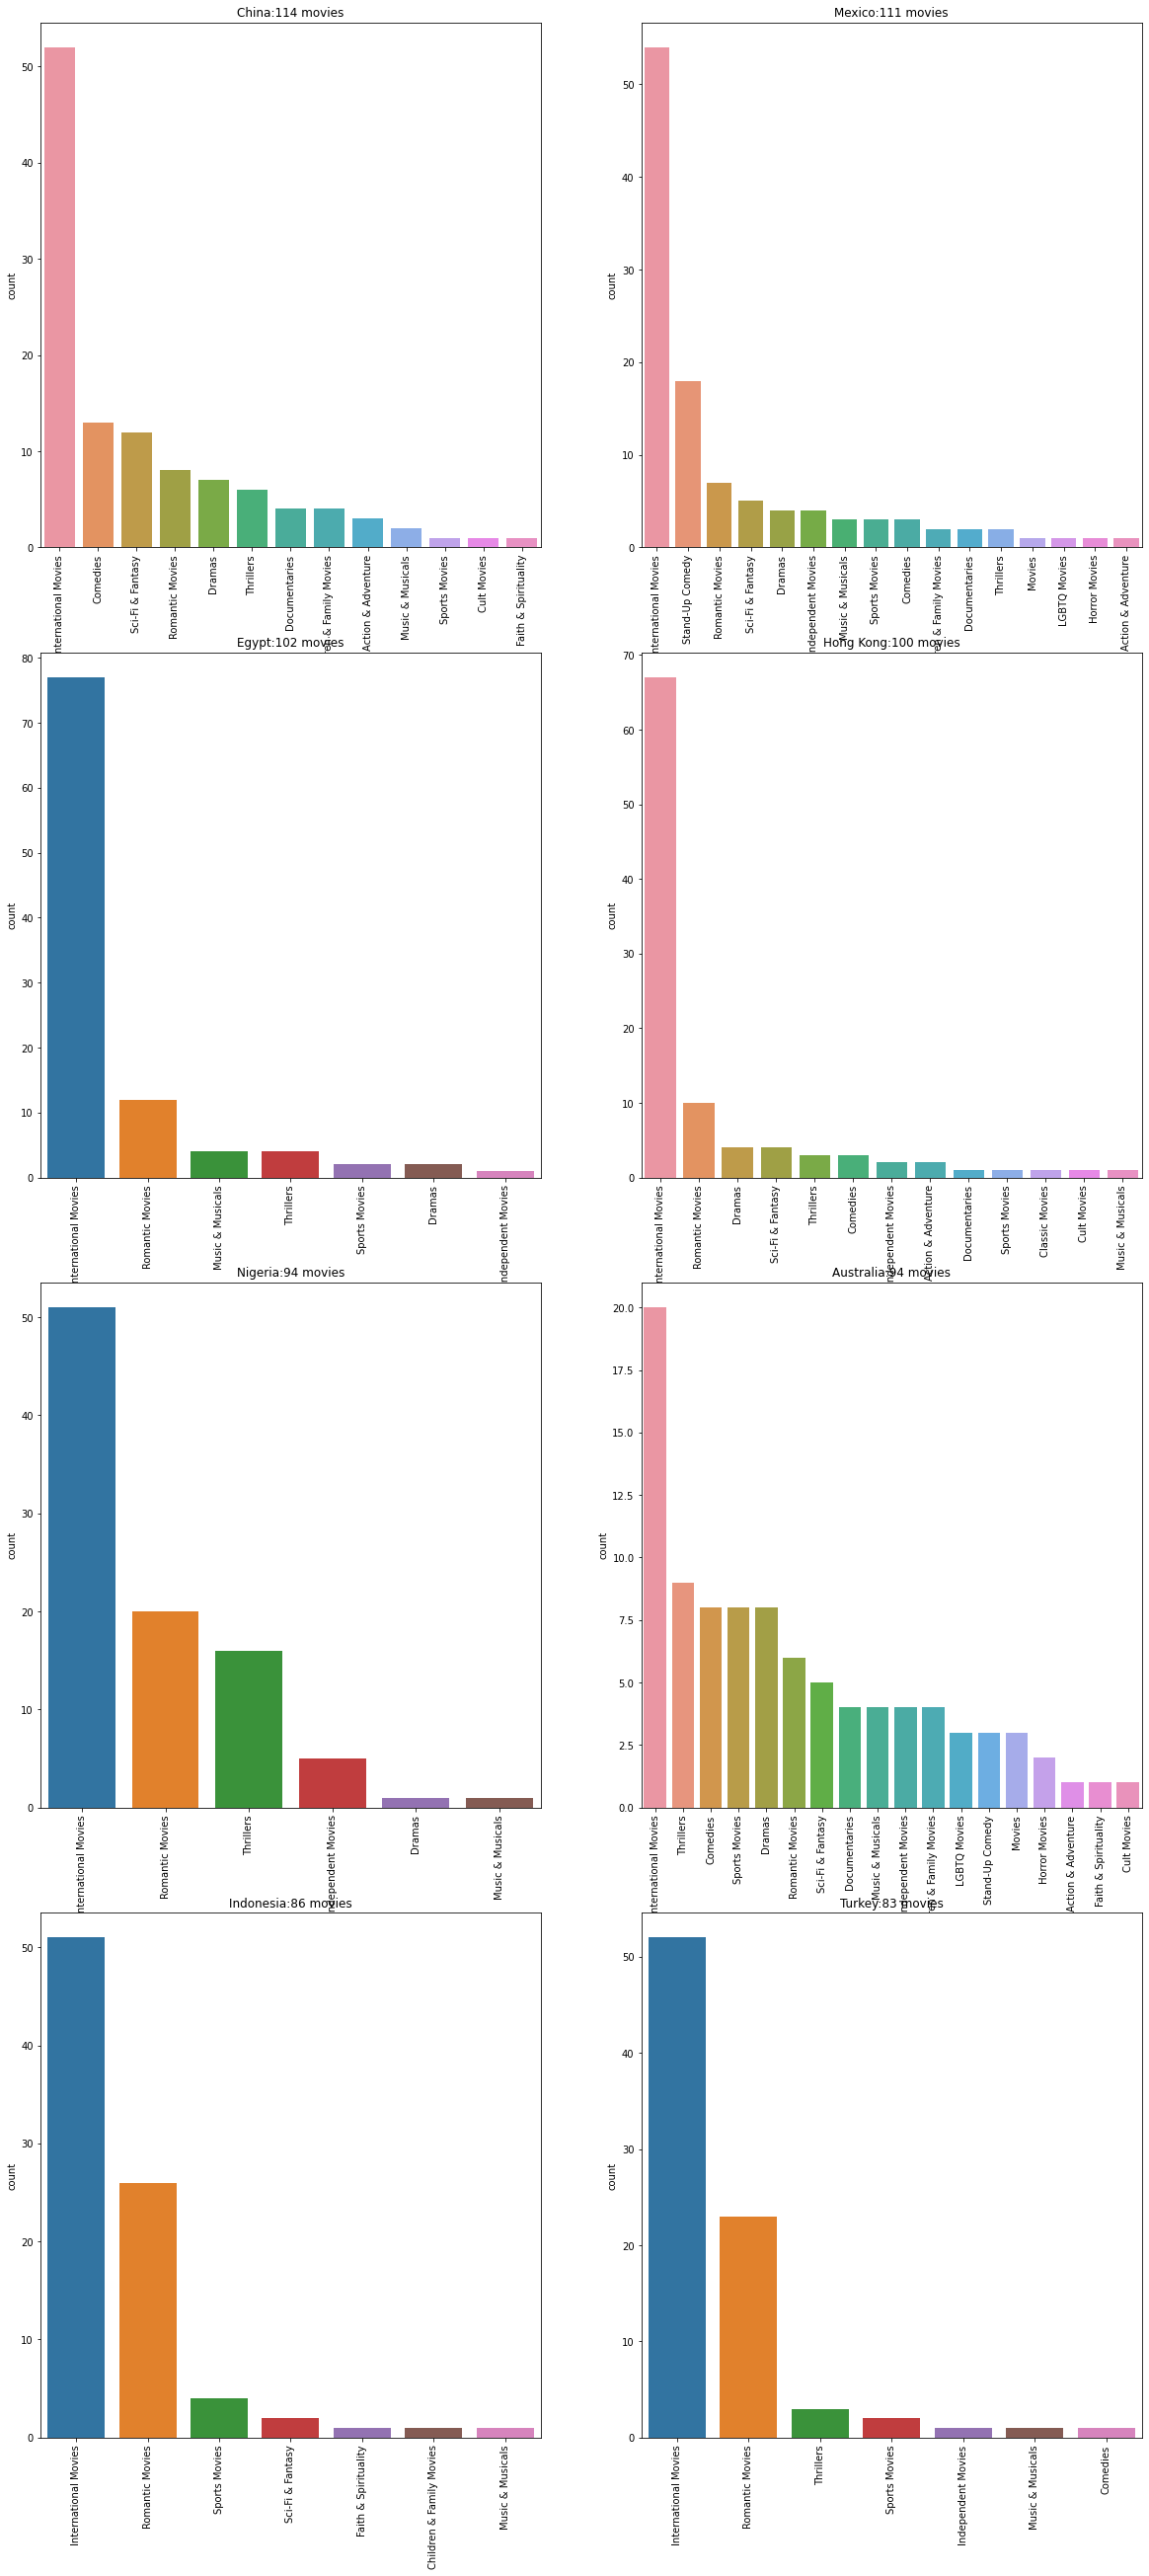

In [ ]:
# different Kind of contents for countries which has minimum 10 movies
movie_genres=country_genres[country_genres['type']=='Movie']
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(20,45))
ax=ax.flatten()
for i,country in enumerate(country_with_min_10_movies.index[8:16]):
  genres=movie_genres[movie_genres['country']==country]['Genre'].value_counts().sort_values(ascending=False)
  #genres.plot(ax=ax[i],kind='bar',grid=True)
  sns.barplot(ax=ax[i],x=genres.index.to_list(),y=genres.to_list())
  ax[i].set_title(f"{country}:{movies[country]} movies")
  ax[i].set_ylabel('count')
  labels=genres.index.to_list()
  #ax[i].set_xticks(range(-1,len(labels)-1))
  ax[i].set_xticklabels(labels,rotation=90)


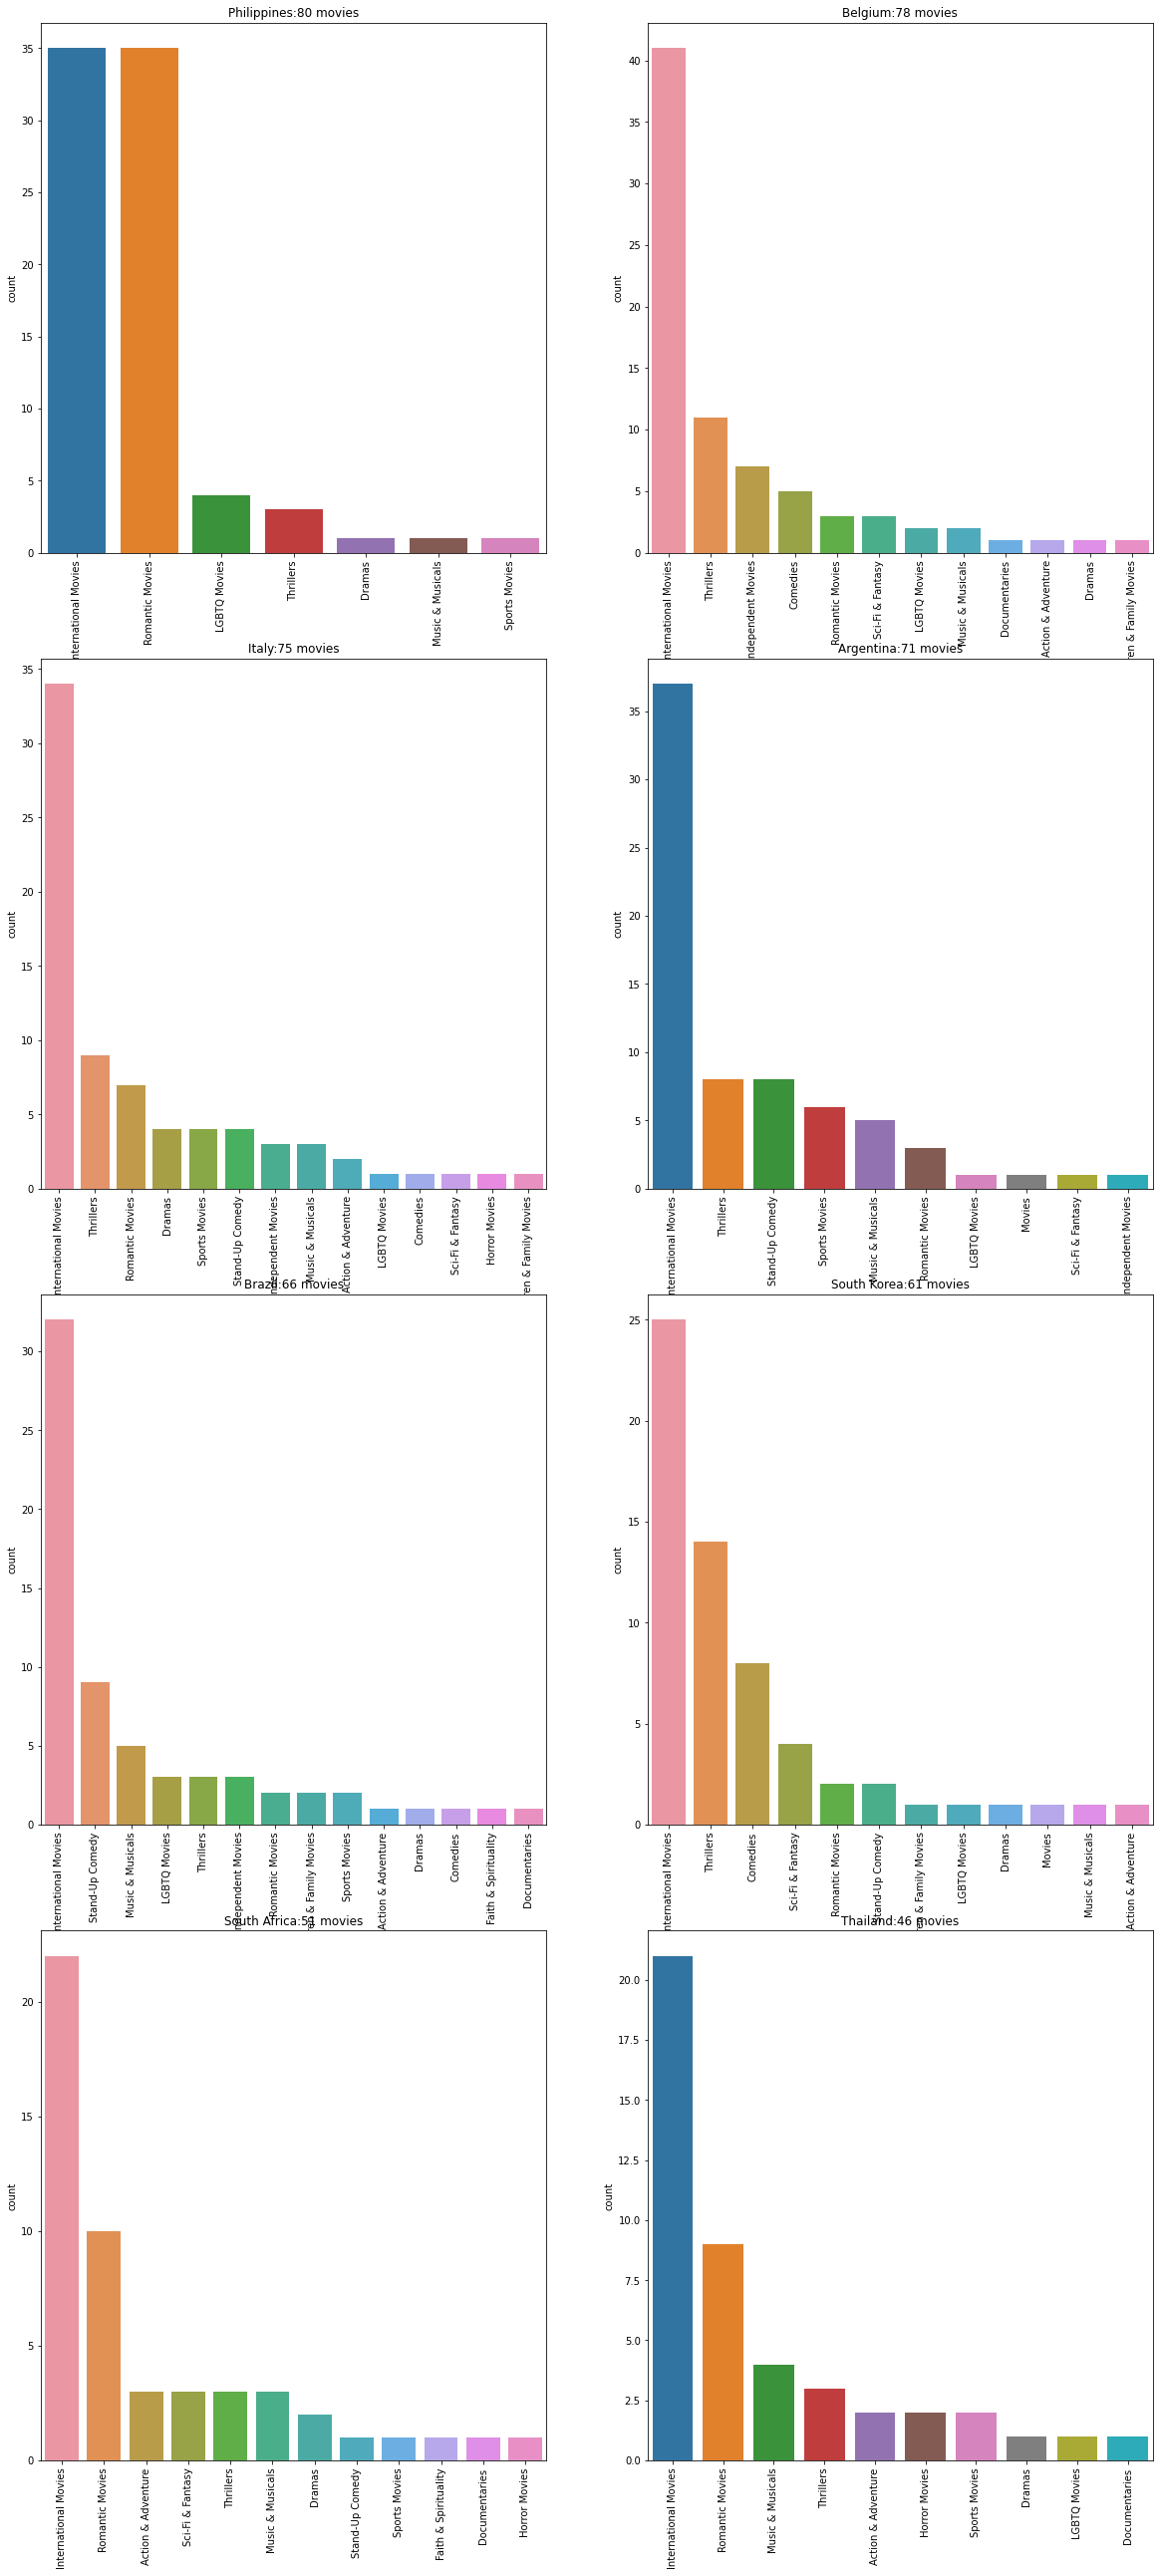

In [ ]:
# different Kind of contents for countries which has minimum 10 movies
movie_genres=country_genres[country_genres['type']=='Movie']
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(20,45))
ax=ax.flatten()
for i,country in enumerate(country_with_min_10_movies.index[16:24]):
  genres=movie_genres[movie_genres['country']==country]['Genre'].value_counts().sort_values(ascending=False)
  #genres.plot(ax=ax[i],kind='bar',grid=True)
  sns.barplot(ax=ax[i],x=genres.index.to_list(),y=genres.to_list())
  ax[i].set_title(f"{country}:{movies[country]} movies")
  ax[i].set_ylabel('count')
  labels=genres.index.to_list()
  #ax[i].set_xticks(range(-1,len(labels)-1))
  ax[i].set_xticklabels(labels,rotation=90)


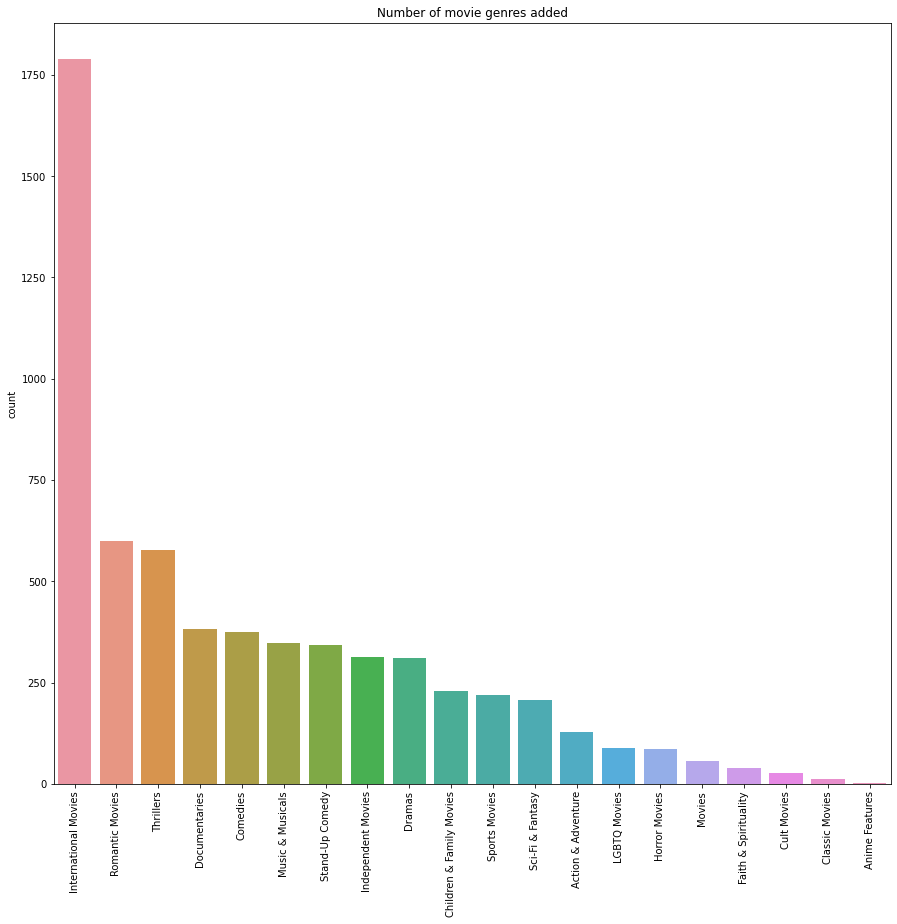

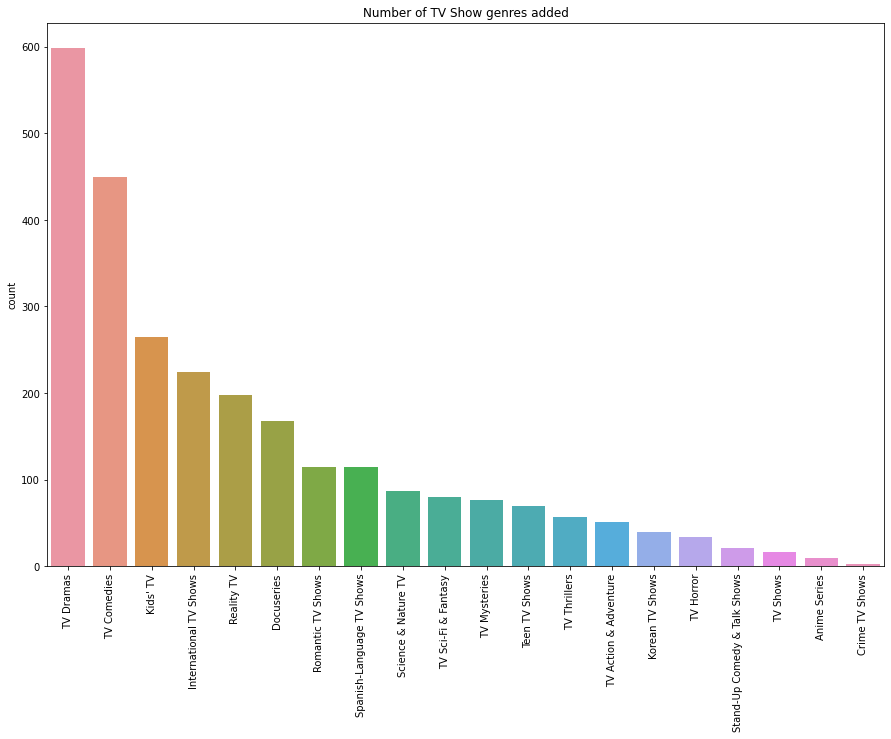

In [ ]:
# count plot for each genre for movies as well as tv shows
plt.figure(figsize=(15,14))
sns.barplot(x=data[data['type']=='Movie'].Genre.value_counts().index,
            y=data[data['type']=='Movie'].Genre.value_counts())
plt.title('Number of movie genres added')
ax=plt.gca()
ax.set_xticklabels(data[data['type']=='Movie'].Genre.value_counts().index,rotation=90)
plt.ylabel('count')
plt.show()


plt.figure(figsize=(15,10))
sns.barplot(x=data[data['type']=='TV Show'].Genre.value_counts().index,
            y=data[data['type']=='TV Show'].Genre.value_counts())
plt.title('Number of TV Show genres added')
ax=plt.gca()
ax.set_xticklabels(data[data['type']=='TV Show'].Genre.value_counts().index,rotation=90)
plt.ylabel('count')
plt.show()
